# PART-2 : PYTORCH Excercise

You are going to repeat this exercise in both TensorFlow (part1) and PyTorch (part2)

# Use the provided datafile and complete the following steps. Complete the assignment within a .ipynb notebook. Submit either the .ipynb, .html, or .pdf of the results.

## Step 1. Import the data from the given .csv file (diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [1]:
import torch
import torch.nn as nn
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv", header=None)
df.head()

0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0

In [3]:
'''
    As the column names are not provided, using some default names to represent them.
'''
column_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8',
               'label']  

df.columns = column_names
df.head()

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

   feature8  label  
0 -0.033333      0  
1 -0.666667      1  
2 -0.633333      0  
3  0.000000      1  
4 -0.600000      0

In [4]:
df.describe()

feature1    feature2    feature3    feature4    feature5    feature6  \
count  759.000000  759.000000  759.000000  759.000000  759.000000  759.000000   
mean    -0.407657    0.218563    0.176505   -0.289735   -0.323534   -0.032245   
std      0.386260    0.306419    0.201287    0.258480    0.375544    0.205376   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.178837   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         feature7    feature8       label  
count  759.000000  759.000000  759.000000  
mean    -0.663253   -0.516162    0.653491  
std      0.283056    0.400794    0.476171  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241   -0.866667    0.000000  
50%     -0.747225   -0.633333    1.000000  
75%     -0.531597   -0.233333    1.000000  
max      1.000000    1.000000    1.000000

## Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

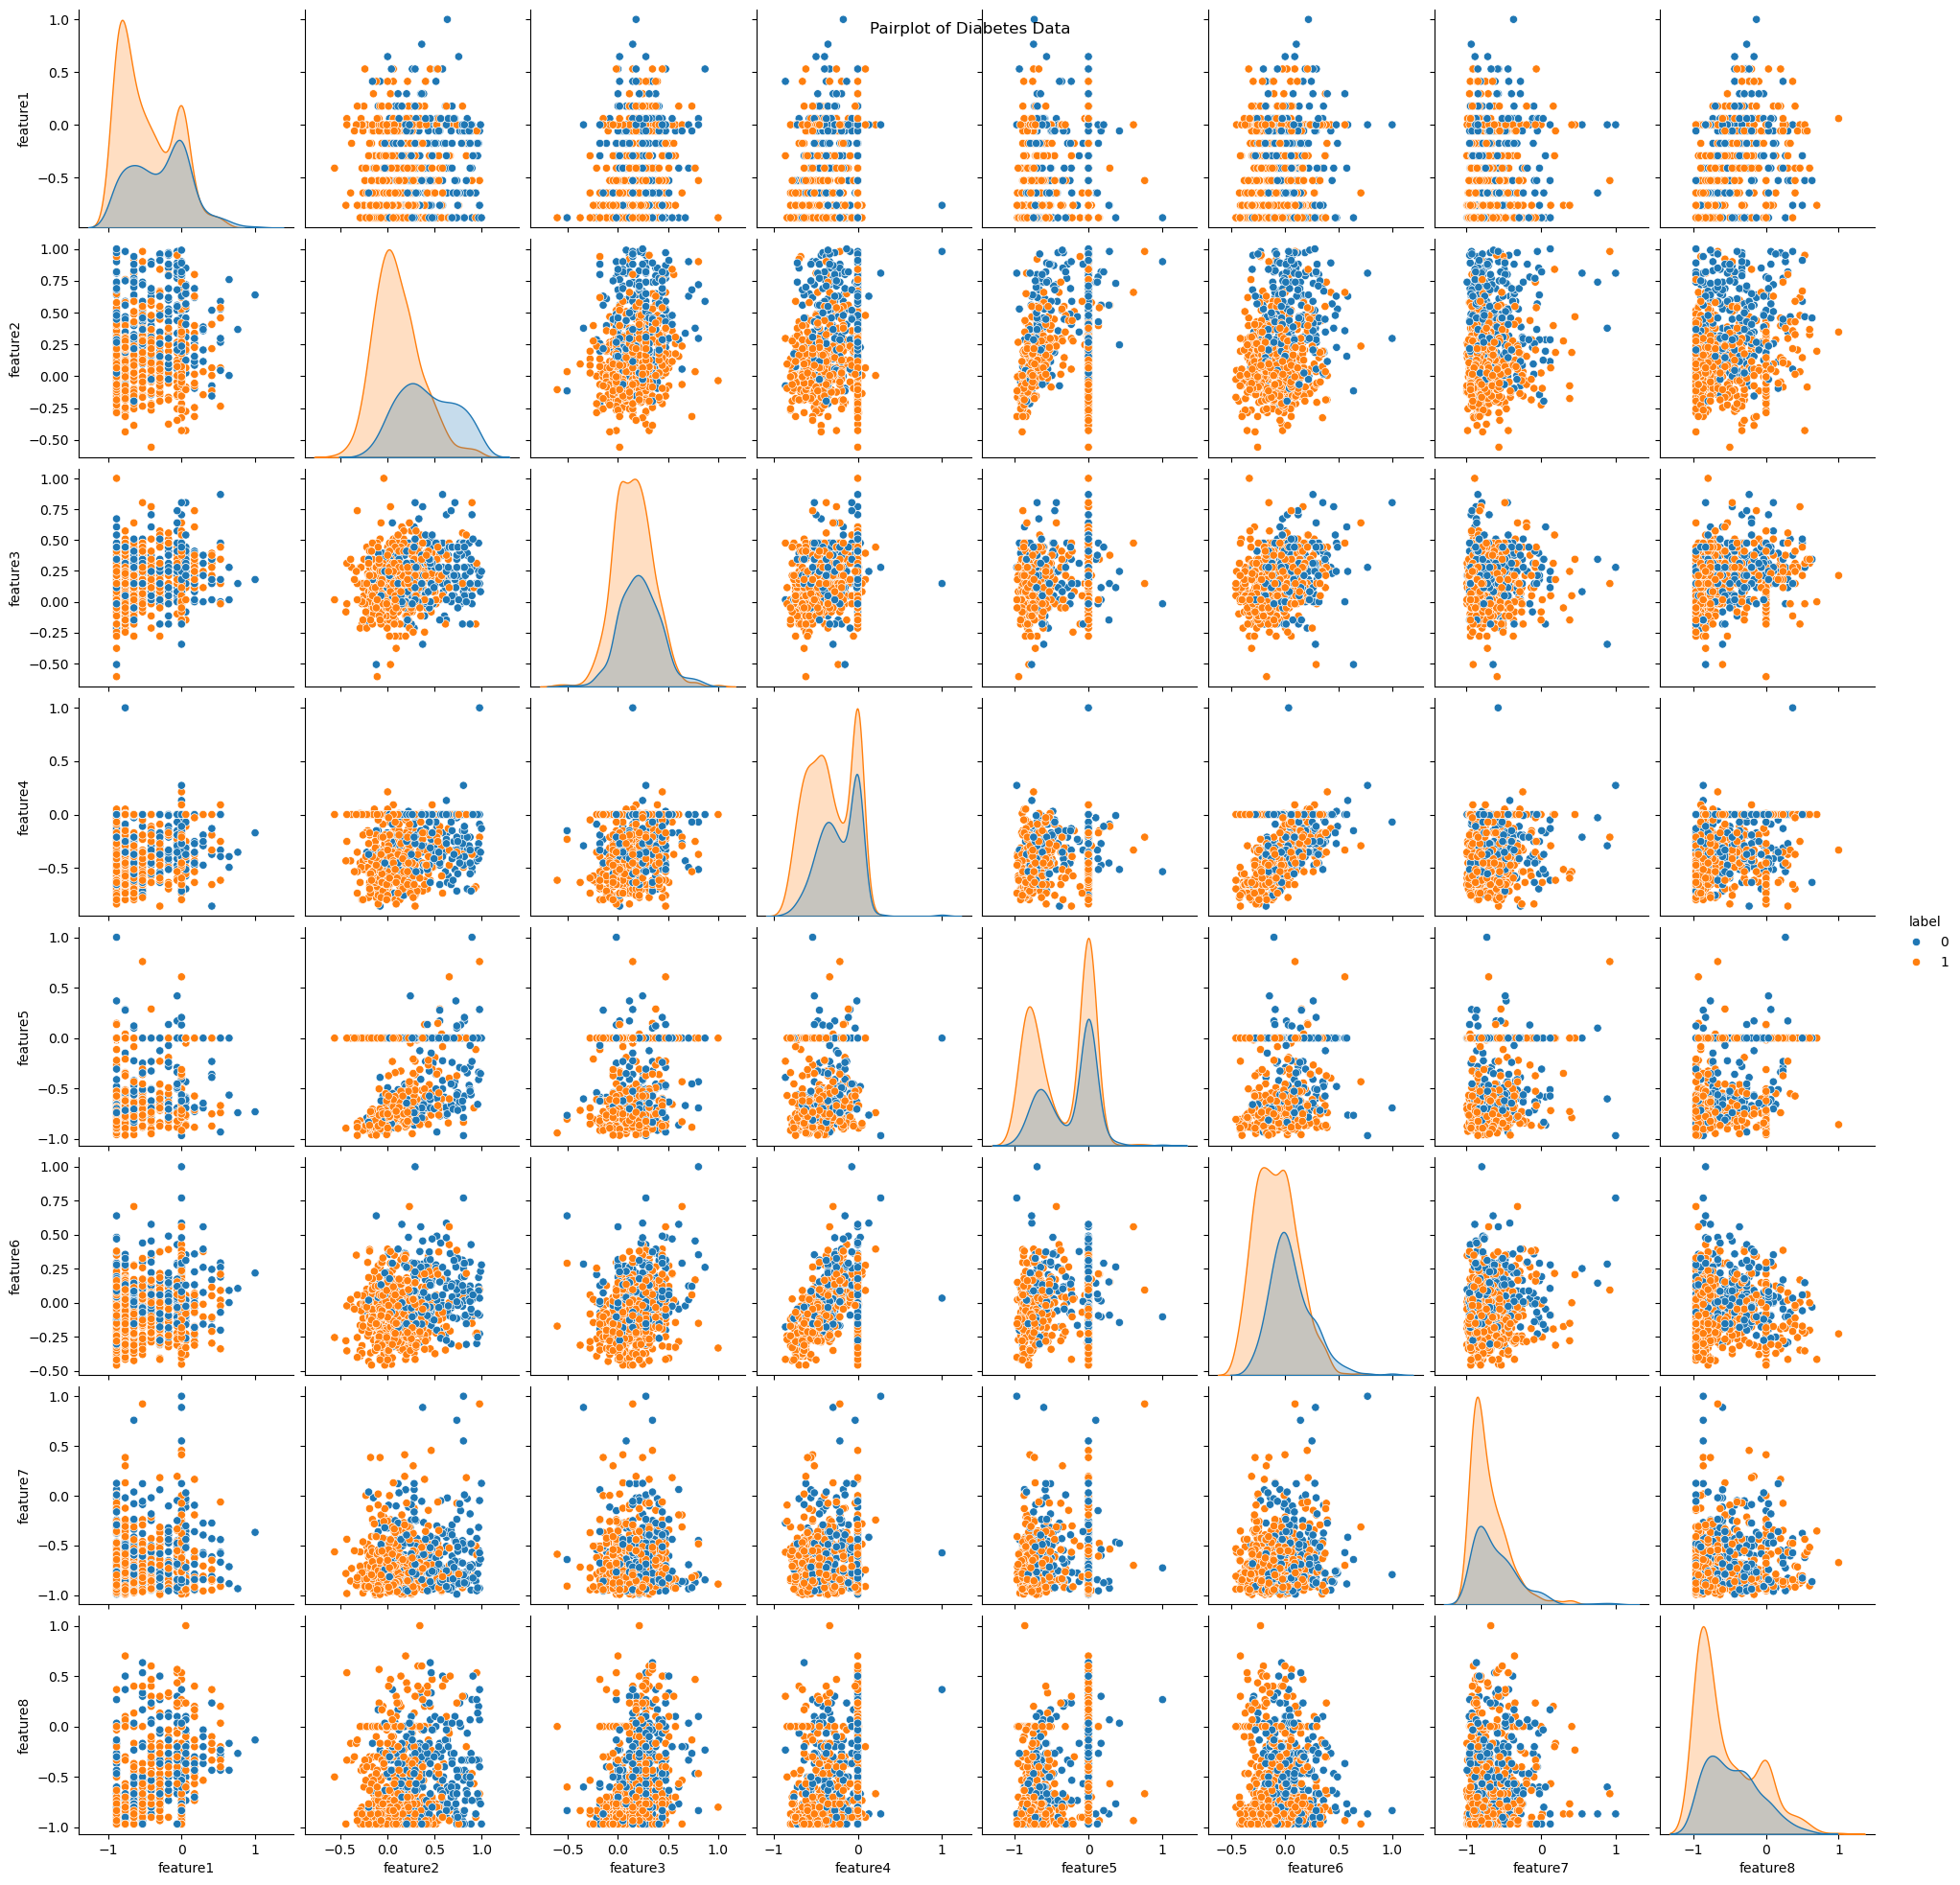

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

"""
    This plot provides scatter plot between each variable.
    It also highlights the both label values in the data, where 
        Red color - represents class 0
        Blue color - represents class 1
        
    It shows for some features clear distinction like feature1 have totally differnt distribution for label 0/1
    it also shows feautre3 have the same distribution for both classes.
"""
sns.pairplot(df,  hue="label", diag_kind="kde")
plt.suptitle("Pairplot of Diabetes Data")
plt.show()

Blue Color represnet "Class-0" and Orange represents "Class-1"


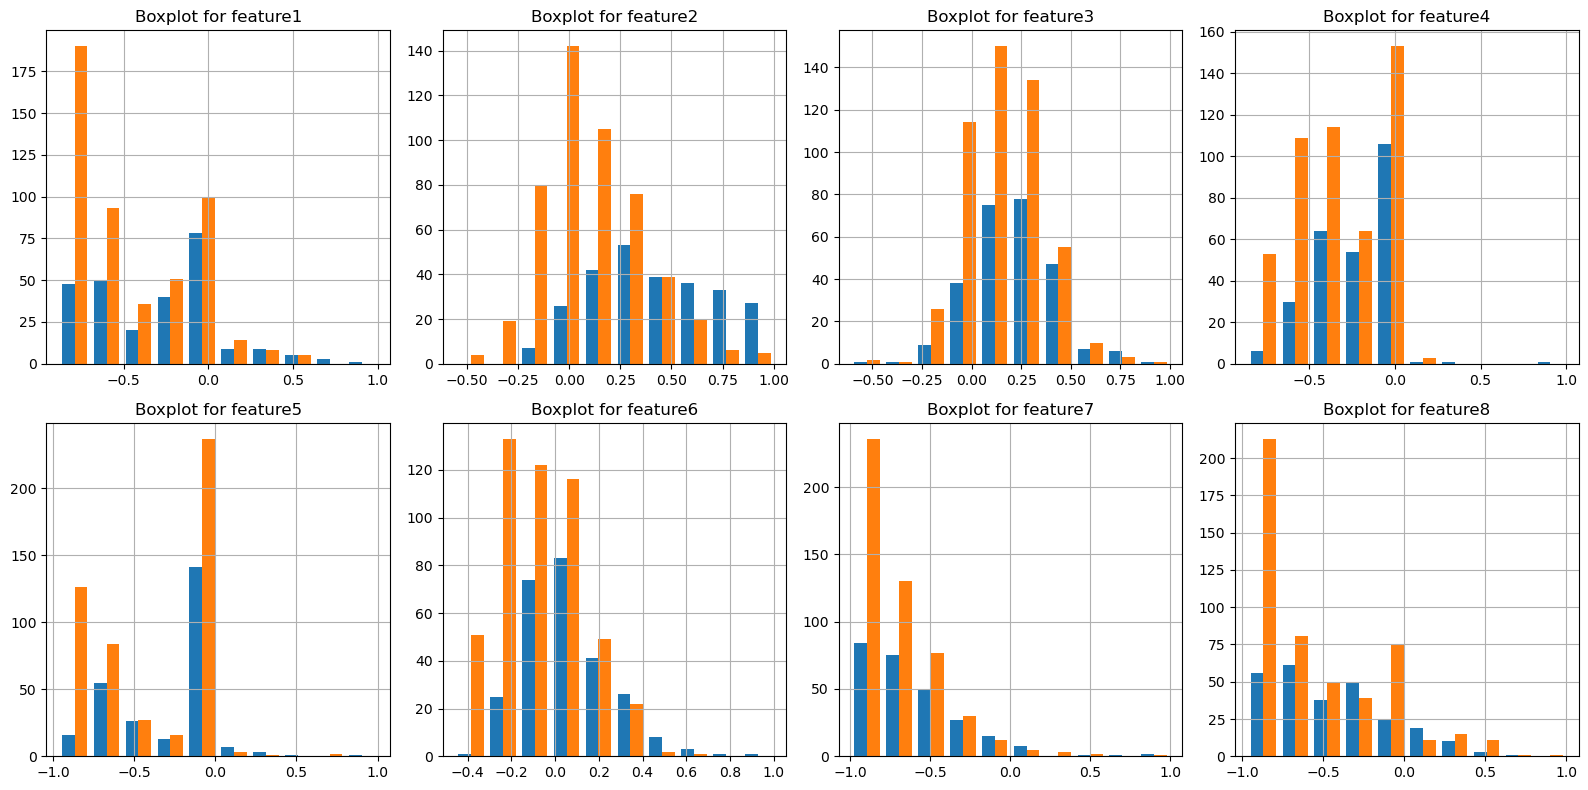

In [6]:
"""
    This is a histogram plot for all the features for both classes.
    and we can see that, its very similar to the pairplots diagonal line
"""
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
%matplotlib inline

print("Blue Color represnet \"Class-0\" and Orange represents \"Class-1\"")

for i, ax in enumerate(axs.flatten()):
    col_name = df.columns[i]  # Extract the feature name
    class_data = [df[df['label'] == 0][col_name], 
                  df[df['label'] == 1][col_name]]
    ax.hist(class_data)
    ax.set_title(f'Boxplot for {col_name}')
    ax.grid(True)

plt.tight_layout()
plt.show()

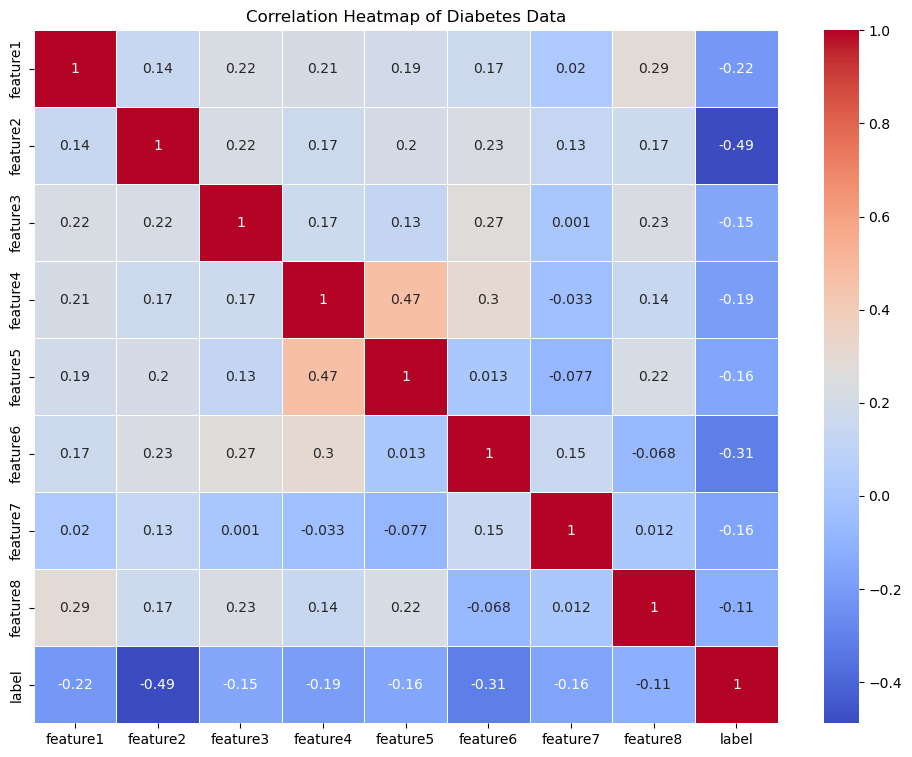

In [7]:
# Correlation Heatmap between all the features and label.
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Diabetes Data")
plt.show()

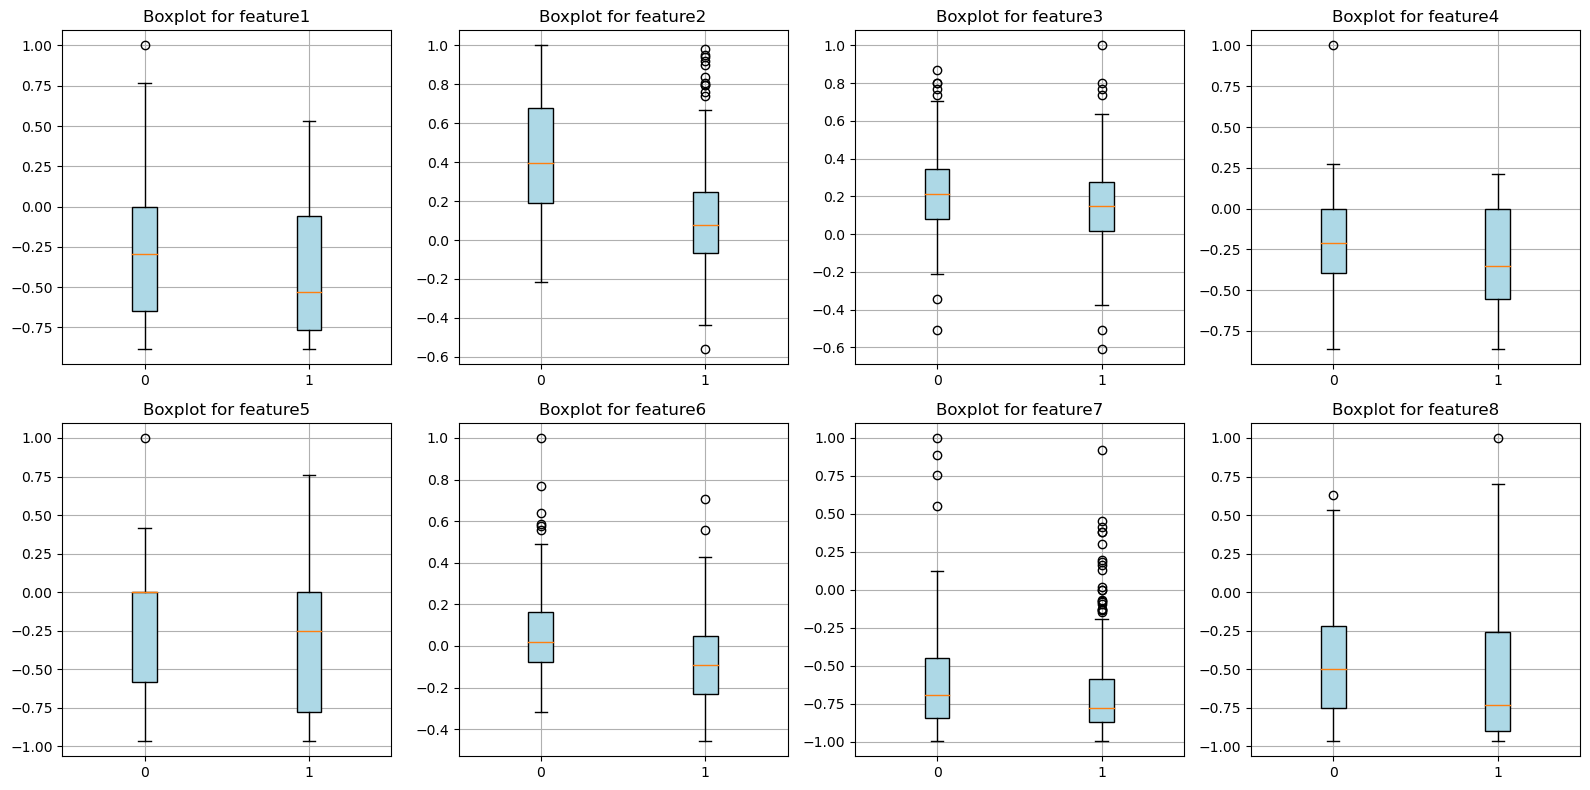

In [8]:
"""
    Creating the Box plots for each features to identify the anamolies for each features for each of the output
    class.
    
    Some of the observations care cleat the for feature2 and feature7 there are a lots of outlier values for 
    class-1, and feature3 and feature6 vice-versa.
"""

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axs.flatten()):
    col_name = df.columns[i]  # Extract the feature name
    class_data = [df[df['label'] == 0][col_name], df[df['label'] == 1][col_name]]
    
    bp = ax.boxplot(class_data, labels=["0", "1"], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    ax.set_title(f'Boxplot for {col_name}')
    ax.grid(True)

plt.tight_layout()
plt.show()

## NOTE - From the plots its clear that the data is already normalized. So the mean is very close to the 0

## Step 3. Split into 80% train 20% test


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def as_tensor(x):
    return torch.tensor(x, dtype=torch.float32)

def split_data(df, standardize=False):
    X = df.drop('label', axis=1).values  # Features
    y = df['label'].values               # Label

    # Split the dataset into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
    
    
    # Standardize the dataset
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    print(f'Train Data size = {X_train.shape}')
    print(f'Test  Data size = {X_test.shape}')
    return X_train, X_test, y_train, y_test

def to_tensor(X_train, X_test, y_train, y_test):
    return as_tensor(X_train), as_tensor(X_test), as_tensor(y_train).reshape(-1, 1), as_tensor(y_test).reshape(-1, 1)

X_train, X_test, y_train, y_test = split_data(df)
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = to_tensor(X_train, X_test, y_train, y_test)
print(f'Train Data size = {X_train_tensor.shape}')
print(f'Test  Data size = {X_test_tensor.shape}')


Train Data size = (607, 8)
Test  Data size = (152, 8)
Train Data size = torch.Size([607, 8])
Test  Data size = torch.Size([152, 8])


## Step 4. Modify the model shown in the demo to take the new data

In [10]:
import torch.optim as optim

def single_layer_neural_network(n):
    hidden_features = n
    model = nn.Sequential(
                nn.Linear(n, hidden_features),
                nn.ReLU(),
                nn.Linear(hidden_features, hidden_features),
                nn.ReLU(),
                nn.Linear(hidden_features, 1),
                nn.Sigmoid()
            )
    return model

single_layer_neural_network(X_train_tensor.shape[1])

Sequential(
  (0): Linear(in_features=8, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

##  Step 5. Train the model on the data

In [11]:
import matplotlib.pyplot as plt
 
def plot_training_metrics(losses, accuracies):
    """
        Plot the traning metrics
    """
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    axs[0].plot(losses)
    axs[0].set_title('Traing Loss vs Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Training Loss')
    axs[0].grid(True)

    axs[1].plot(accuracies)
    axs[1].set_title('Training Accuracy vs Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Training Accuracy')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


In [12]:
def train(X_train, y_train, nn_model, criterion, optimizer, epochs, batch_size, verbose=False):
    """
        This function trains the neural network created using pytorch
    """
    losses = []
    accuracies = []
    
    for epoch in range(epochs):
        
        epoch_loss = 0
        epoch_accuracy = 0
        permutation = torch.randperm(X_train.shape[0])
        
        for i in range(0, X_train.shape[0], batch_size):
            indices = permutation[i:i+batch_size]

            X = X_train[indices]
            y_true = y_train[indices].view(-1, 1)  # Ensure y_true has the correct shape

            optimizer.zero_grad()
            y_pred = nn_model(X)
            loss = criterion(y_pred, y_true)
            loss.backward()
            optimizer.step()

            acc = ((y_pred >= 0.5).float() == y_true).float().mean()  # Adjust for binary classification
            epoch_loss += loss.item()
            epoch_accuracy += acc.item()
            
        losses.append(epoch_loss * batch_size/ len(X_train))
        accuracies.append(epoch_accuracy * batch_size/ len(X_train))

        if verbose and (epoch+1)%(epochs//5)==0: 
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {losses[-1]:.4f}, Accuracy: {accuracies[-1]:.4f}')    

    if verbose:
        plot_training_metrics(losses, accuracies)
        
    return nn_model, losses, accuracies

Epoch [100/500], Loss: 0.4511, Accuracy: 0.7821
Epoch [200/500], Loss: 0.4196, Accuracy: 0.8053
Epoch [300/500], Loss: 0.4082, Accuracy: 0.8185
Epoch [400/500], Loss: 0.4086, Accuracy: 0.8102
Epoch [500/500], Loss: 0.3936, Accuracy: 0.8367


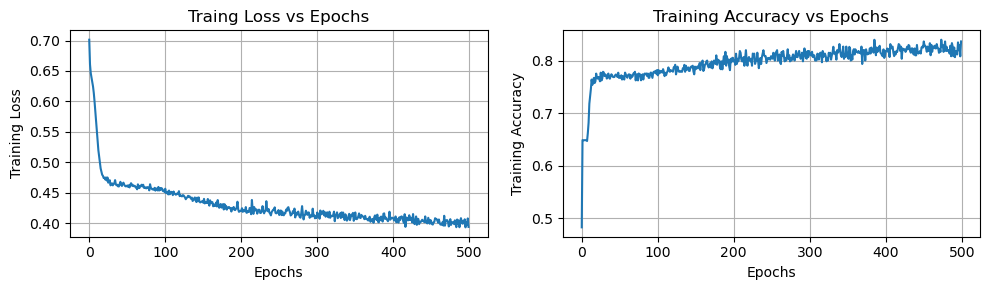

In [13]:
single_layer_trained_model = single_layer_neural_network(X_train.shape[1])
single_layer_trained_model, _, _ = train(X_train_tensor, 
                                   y_train_tensor, 
                                   single_layer_trained_model, 
                                   criterion = nn.BCELoss(),
                                   optimizer = optim.SGD(single_layer_trained_model.parameters(), lr=0.1),
                                   epochs = 500, 
                                   verbose = True,
                                   batch_size=32
                                  )

Epoch [100/500], Loss: 0.3964, Accuracy: 0.8067
Epoch [200/500], Loss: 0.3966, Accuracy: 0.8086
Epoch [300/500], Loss: 0.3813, Accuracy: 0.8151
Epoch [400/500], Loss: 0.3707, Accuracy: 0.8234
Epoch [500/500], Loss: 0.4218, Accuracy: 0.8068


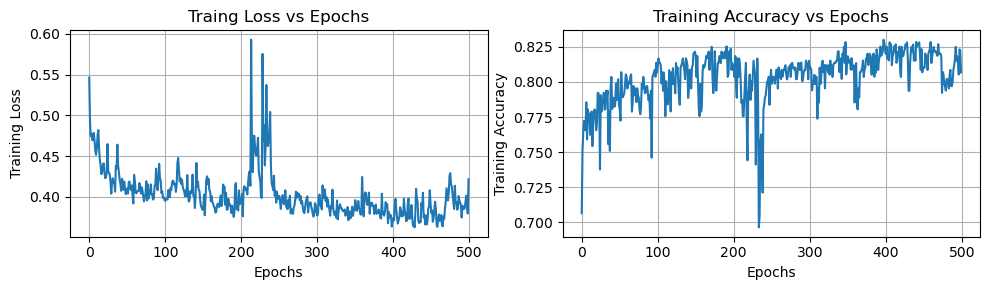

In [14]:
single_layer_trained_model = single_layer_neural_network(X_train.shape[1])
single_layer_trained_model, _, _ = train(X_train_tensor, 
                                   y_train_tensor, 
                                   single_layer_trained_model, 
                                   criterion = nn.BCELoss(),
                                   optimizer = optim.Adam(single_layer_trained_model.parameters(), lr=0.1),
                                   epochs = 500, 
                                   verbose = True,
                                   batch_size=32
                                  )

### As we can see that the model trained with Adam Optimizer have a lot of noise compare to SGD optmizer.

##  Step 6. Make predictions on the test data and compare them to the test labels

In [15]:
def predict_pytorch(model, X, verbose=1, records=5):
    model.eval()
    y_prob = model(X)
    predictions = (y_prob > 0.5).float()
    
    if verbose != 0:
        print("raw scores = ", y_prob.squeeze()[:records])
        print("predictions = ", predictions.squeeze()[:records])
        
    return predictions

In [16]:
y_pred = predict_pytorch(single_layer_trained_model, X_test_tensor, verbose=1, records=10)


raw scores =  tensor([1.0000, 0.6097, 0.8860, 1.0000, 1.0000, 0.9608, 0.6097, 0.9997, 0.6097,
        1.0000], grad_fn=<SliceBackward0>)
predictions =  tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


## Step 7. Calculate the accuracy of your results

In [17]:
def calculate_accuracy_pytorch(y_test, y_pred):
    # Calculate accuracy
    correct_predictions = (y_pred == y_test).sum().item()
    total_samples = y_test.size(0)
    accuracy = correct_predictions / total_samples * 100
    return accuracy

In [18]:
accuracy = calculate_accuracy_pytorch(y_test_tensor, y_pred)
print(f"{accuracy = }")

accuracy = 74.3421052631579


## Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

In [19]:
def load_different_pytorch_model(n):
    """
        Creating Differnet Neural Network with different layers and activation function.
        
        Made Neural Networks Deep or Wide or Deep and Wide both. 
        Tried experimeting with different optimizers also.
                
        Programmatically it was getting complex, so defining all of them and later execute them with differnet 
        hyper parameters
    """
    
    # 3 layer network with 1 hidden layer and having the n/2 = 4 hidden feature, and Relu activation function
    hidden_features = n//2
    model1 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )
    
    # 3 layer network with 1 hidden layer and having the n/2 = 4 hidden feature, and Sigmoid as activation function
    hidden_features = n//2
    model2 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )

    # 3 layer network with 1 hidden layer and having the n*2 = 16 hidden feature, and Relu as activation function
    hidden_features = n*2
    model3 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )

    # 3 layer network with 1 hidden layer and having the n*2 = 16 hidden feature, and Sigmoid as activation function
    hidden_features = n*2
    model4 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, 1),
            nn.Sigmoid()
            )

    # 5 layer network with 1 hidden layer and having the n*4 = 16 hidden feature, and Relu as activation function
    hidden_features = n*4
    model5 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features//2),
            nn.ReLU(),
            nn.Linear(hidden_features//2, hidden_features//4),
            nn.ReLU(),
            nn.Linear(hidden_features//4, 1),
            nn.Sigmoid()
            )

    # 5 layer network with 1 hidden layer and having the n*4 = 16 hidden feature, and Sigmoid as activation function
    hidden_features = n*4
    model6 = nn.Sequential(
            nn.Linear(n, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, hidden_features//2),
            nn.Sigmoid(),
            nn.Linear(hidden_features//2, hidden_features//4),
            nn.Sigmoid(),
            nn.Linear(hidden_features//4, 1),
            nn.Sigmoid()
            )


    models = [model1, model2, model3, model4, model5, model6]
    names = ["3-Layer-narrow_Relu", "3-Layer-narrow_Sigmoid", 
             "3-Layer-wide_Relu", "3-Layer-wide_Sigmoid",
             "5-layer-wide-deep_Relu", "5-layer-wide-deep_Sigmoid"
            ]
    return models, names

## Step 9. Test your hypothesis by training your new models

Epoch [20/100], Loss: 0.6121, Accuracy: 0.6487
Epoch [40/100], Loss: 0.4741, Accuracy: 0.7739
Epoch [60/100], Loss: 0.4653, Accuracy: 0.7690
Epoch [80/100], Loss: 0.4625, Accuracy: 0.7706
Epoch [100/100], Loss: 0.4619, Accuracy: 0.7737


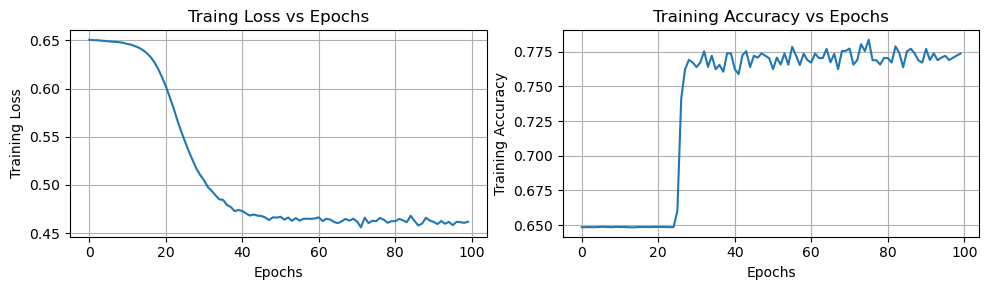

name='1_3-Layer-narrow_Relu_adam_100_32' optimizer_name='adam', epochs=100, loss=0.4618789650855779
Epoch [20/100], Loss: 0.6497, Accuracy: 0.6486
Epoch [40/100], Loss: 0.6493, Accuracy: 0.6483
Epoch [60/100], Loss: 0.6483, Accuracy: 0.6486
Epoch [80/100], Loss: 0.6471, Accuracy: 0.6486
Epoch [100/100], Loss: 0.6445, Accuracy: 0.6486


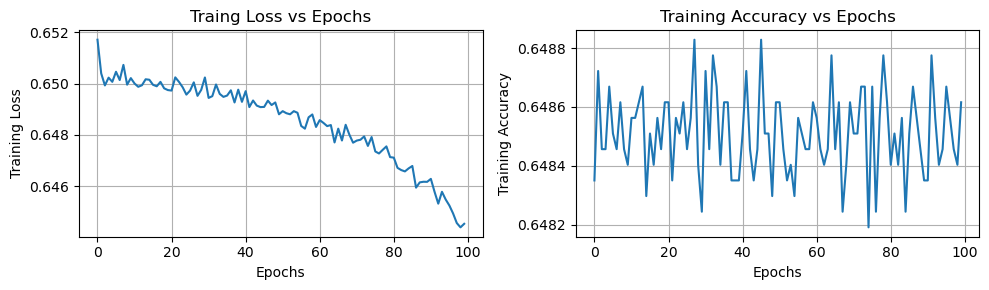

name='2_3-Layer-narrow_Sigmoid_adam_100_32' optimizer_name='adam', epochs=100, loss=0.6445247486749237
Epoch [20/100], Loss: 0.4757, Accuracy: 0.7673
Epoch [40/100], Loss: 0.4638, Accuracy: 0.7692
Epoch [60/100], Loss: 0.4468, Accuracy: 0.7790
Epoch [80/100], Loss: 0.4382, Accuracy: 0.7754
Epoch [100/100], Loss: 0.4408, Accuracy: 0.7805


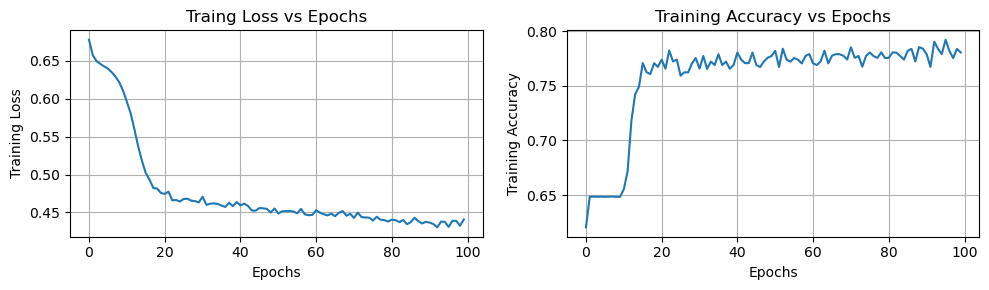

name='3_3-Layer-wide_Relu_adam_100_32' optimizer_name='adam', epochs=100, loss=0.4407822076335574
Epoch [20/100], Loss: 0.6510, Accuracy: 0.6487
Epoch [40/100], Loss: 0.6510, Accuracy: 0.6487
Epoch [60/100], Loss: 0.6495, Accuracy: 0.6486
Epoch [80/100], Loss: 0.6489, Accuracy: 0.6486
Epoch [100/100], Loss: 0.6491, Accuracy: 0.6484


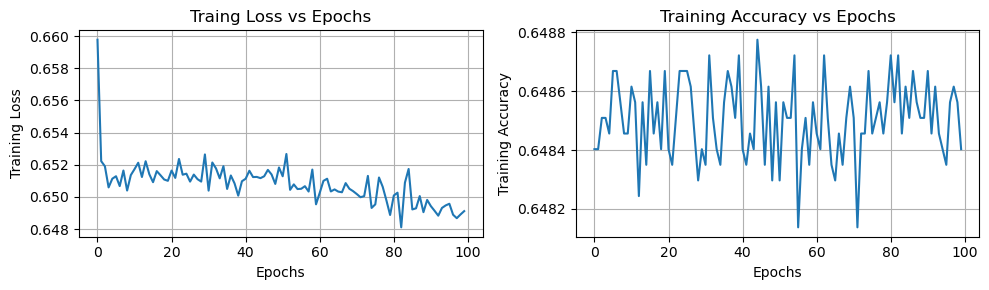

name='4_3-Layer-wide_Sigmoid_adam_100_32' optimizer_name='adam', epochs=100, loss=0.6491205696219078
Epoch [20/100], Loss: 0.6480, Accuracy: 0.6485
Epoch [40/100], Loss: 0.5108, Accuracy: 0.7673
Epoch [60/100], Loss: 0.4648, Accuracy: 0.7787
Epoch [80/100], Loss: 0.4389, Accuracy: 0.7954
Epoch [100/100], Loss: 0.4347, Accuracy: 0.7854


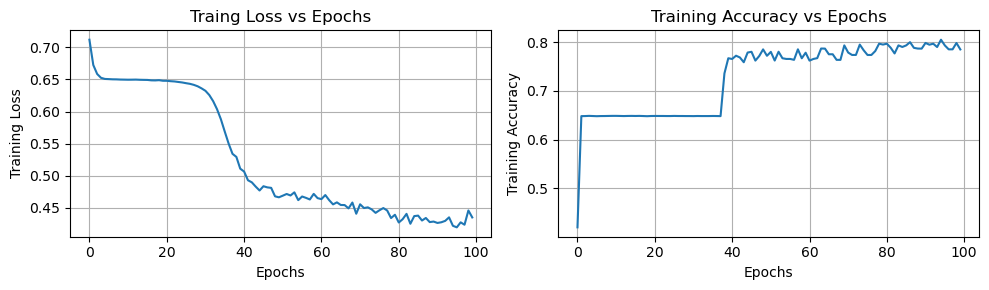

name='5_5-layer-wide-deep_Relu_adam_100_32' optimizer_name='adam', epochs=100, loss=0.4347206992411731
Epoch [20/100], Loss: 0.6506, Accuracy: 0.6486
Epoch [40/100], Loss: 0.6510, Accuracy: 0.6484
Epoch [60/100], Loss: 0.6504, Accuracy: 0.6484
Epoch [80/100], Loss: 0.6514, Accuracy: 0.6485
Epoch [100/100], Loss: 0.6512, Accuracy: 0.6484


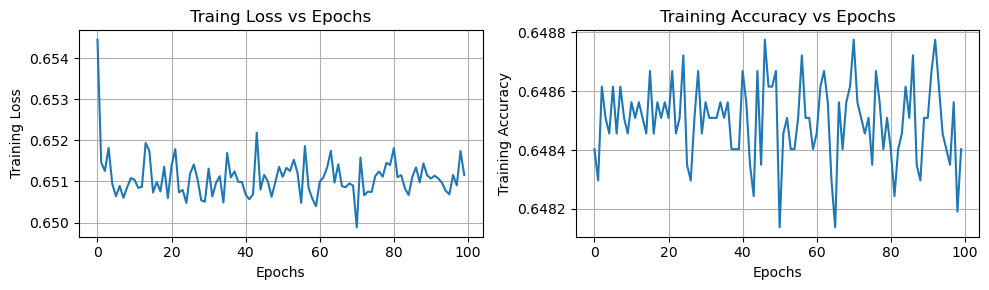

name='6_5-layer-wide-deep_Sigmoid_adam_100_32' optimizer_name='adam', epochs=100, loss=0.6511577090871393
Epoch [20/100], Loss: 0.6081, Accuracy: 0.6483
Epoch [40/100], Loss: 0.4797, Accuracy: 0.7723
Epoch [60/100], Loss: 0.4644, Accuracy: 0.7805
Epoch [80/100], Loss: 0.4507, Accuracy: 0.7938
Epoch [100/100], Loss: 0.4451, Accuracy: 0.7856


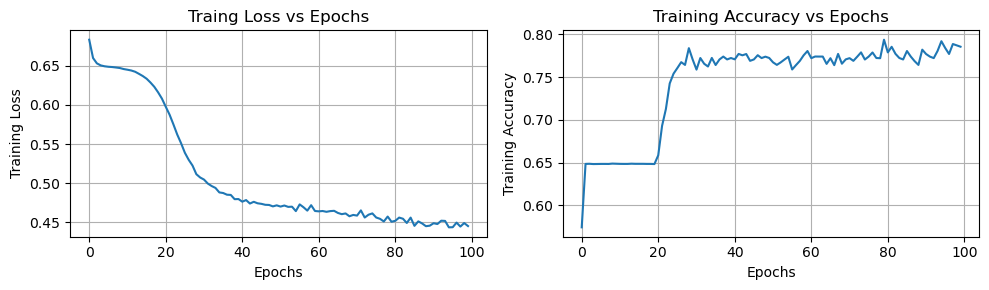

name='1_3-Layer-narrow_Relu_SGD_100_32' optimizer_name='SGD', epochs=100, loss=0.445145888226429
Epoch [20/100], Loss: 0.6508, Accuracy: 0.6483
Epoch [40/100], Loss: 0.6505, Accuracy: 0.6484
Epoch [60/100], Loss: 0.6505, Accuracy: 0.6486
Epoch [80/100], Loss: 0.6505, Accuracy: 0.6485
Epoch [100/100], Loss: 0.6505, Accuracy: 0.6485


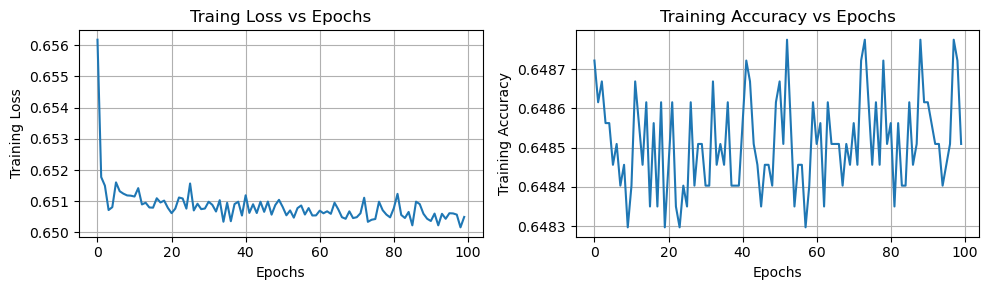

name='2_3-Layer-narrow_Sigmoid_SGD_100_32' optimizer_name='SGD', epochs=100, loss=0.6504969086246396
Epoch [20/100], Loss: 0.4776, Accuracy: 0.7706
Epoch [40/100], Loss: 0.4618, Accuracy: 0.7673
Epoch [60/100], Loss: 0.4491, Accuracy: 0.7722
Epoch [80/100], Loss: 0.4454, Accuracy: 0.7854
Epoch [100/100], Loss: 0.4268, Accuracy: 0.7936


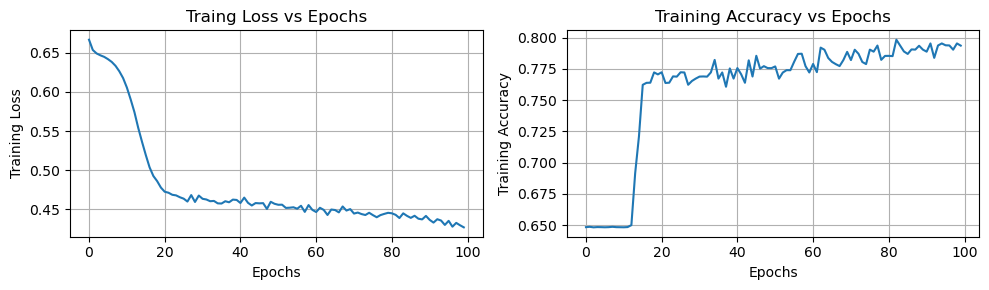

name='3_3-Layer-wide_Relu_SGD_100_32' optimizer_name='SGD', epochs=100, loss=0.4267647254604484
Epoch [20/100], Loss: 0.6510, Accuracy: 0.6487
Epoch [40/100], Loss: 0.6490, Accuracy: 0.6485
Epoch [60/100], Loss: 0.6481, Accuracy: 0.6485
Epoch [80/100], Loss: 0.6459, Accuracy: 0.6484
Epoch [100/100], Loss: 0.6405, Accuracy: 0.6484


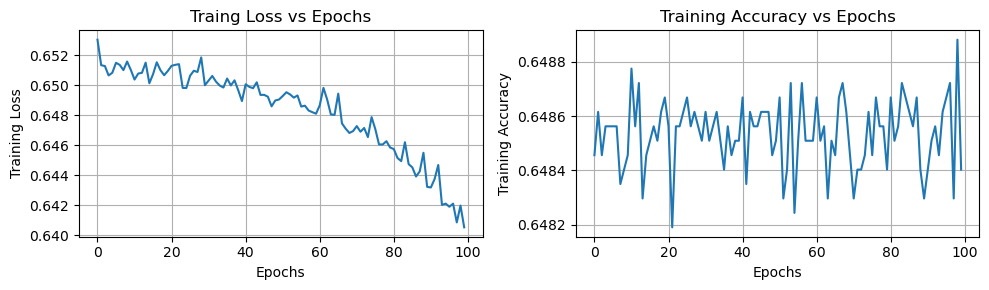

name='4_3-Layer-wide_Sigmoid_SGD_100_32' optimizer_name='SGD', epochs=100, loss=0.640533459834644
Epoch [20/100], Loss: 0.6502, Accuracy: 0.6487
Epoch [40/100], Loss: 0.6491, Accuracy: 0.6486
Epoch [60/100], Loss: 0.6000, Accuracy: 0.6486
Epoch [80/100], Loss: 0.4675, Accuracy: 0.7739
Epoch [100/100], Loss: 0.4526, Accuracy: 0.7756


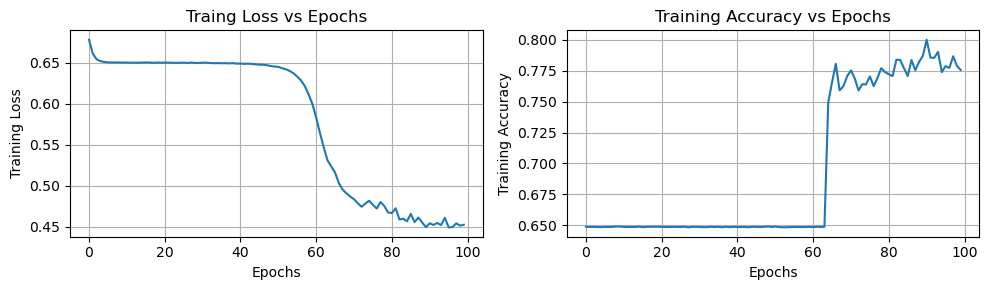

name='5_5-layer-wide-deep_Relu_SGD_100_32' optimizer_name='SGD', epochs=100, loss=0.4525584059060111
Epoch [20/100], Loss: 0.6517, Accuracy: 0.6483
Epoch [40/100], Loss: 0.6509, Accuracy: 0.6485
Epoch [60/100], Loss: 0.6510, Accuracy: 0.6487
Epoch [80/100], Loss: 0.6508, Accuracy: 0.6484
Epoch [100/100], Loss: 0.6510, Accuracy: 0.6485


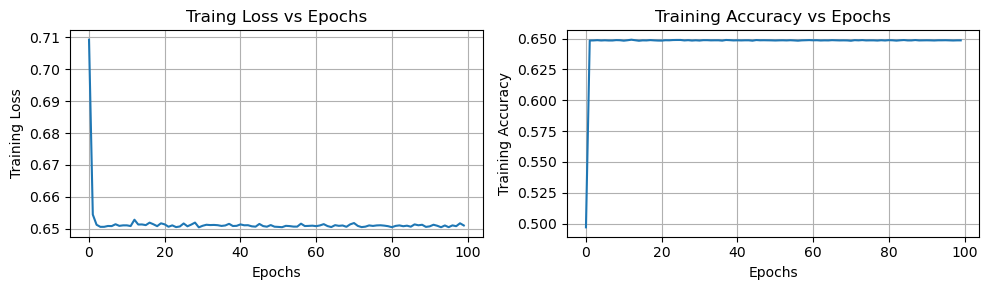

name='6_5-layer-wide-deep_Sigmoid_SGD_100_32' optimizer_name='SGD', epochs=100, loss=0.651018485205963
Epoch [20/100], Loss: 0.6813, Accuracy: 0.6808
Epoch [40/100], Loss: 0.6131, Accuracy: 0.6755
Epoch [60/100], Loss: 0.5063, Accuracy: 0.8147
Epoch [80/100], Loss: 0.4915, Accuracy: 0.8130
Epoch [100/100], Loss: 0.4854, Accuracy: 0.8197


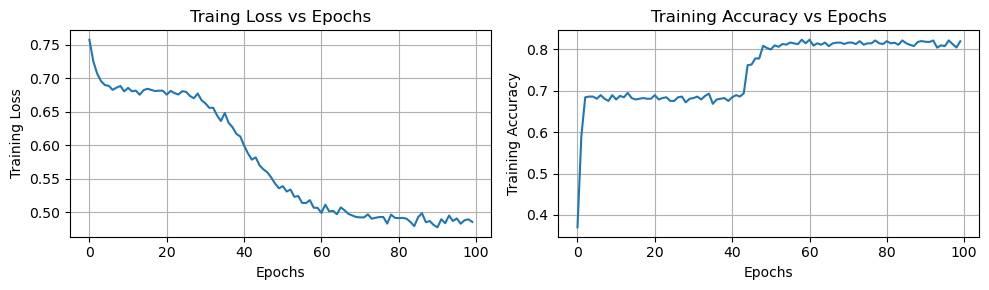

name='1_3-Layer-narrow_Relu_adam_100_64' optimizer_name='adam', epochs=100, loss=0.4853518892944939
Epoch [20/100], Loss: 0.6843, Accuracy: 0.6825
Epoch [40/100], Loss: 0.6830, Accuracy: 0.6843
Epoch [60/100], Loss: 0.6817, Accuracy: 0.6860
Epoch [80/100], Loss: 0.6830, Accuracy: 0.6825
Epoch [100/100], Loss: 0.6849, Accuracy: 0.6790


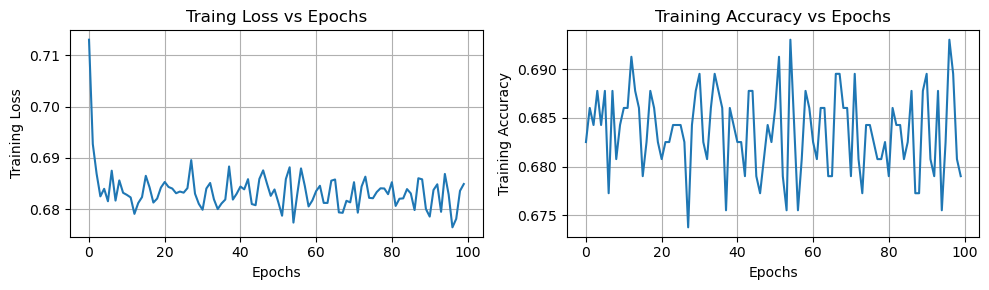

name='2_3-Layer-narrow_Sigmoid_adam_100_64' optimizer_name='adam', epochs=100, loss=0.684930182367416
Epoch [20/100], Loss: 0.5211, Accuracy: 0.8151
Epoch [40/100], Loss: 0.4839, Accuracy: 0.8147
Epoch [60/100], Loss: 0.4780, Accuracy: 0.8197
Epoch [80/100], Loss: 0.4673, Accuracy: 0.8267
Epoch [100/100], Loss: 0.4697, Accuracy: 0.8129


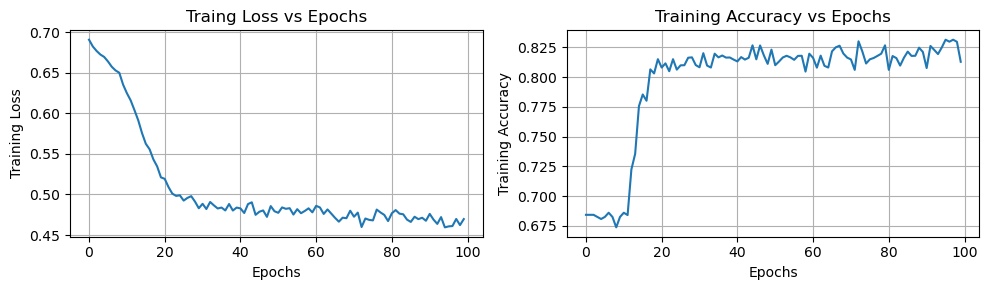

name='3_3-Layer-wide_Relu_adam_100_64' optimizer_name='adam', epochs=100, loss=0.4697426508443163
Epoch [20/100], Loss: 0.6828, Accuracy: 0.6843
Epoch [40/100], Loss: 0.6830, Accuracy: 0.6843
Epoch [60/100], Loss: 0.6803, Accuracy: 0.6860
Epoch [80/100], Loss: 0.6829, Accuracy: 0.6808
Epoch [100/100], Loss: 0.6805, Accuracy: 0.6808


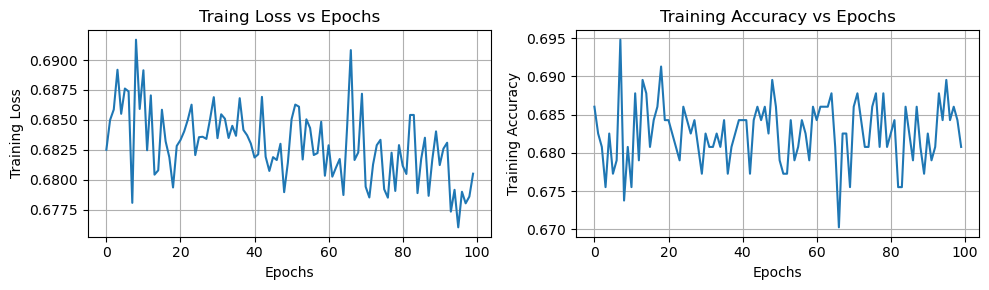

name='4_3-Layer-wide_Sigmoid_adam_100_64' optimizer_name='adam', epochs=100, loss=0.6805013439800633
Epoch [20/100], Loss: 0.6839, Accuracy: 0.6825
Epoch [40/100], Loss: 0.6815, Accuracy: 0.6843
Epoch [60/100], Loss: 0.6672, Accuracy: 0.6808
Epoch [80/100], Loss: 0.4949, Accuracy: 0.8151
Epoch [100/100], Loss: 0.4839, Accuracy: 0.8112


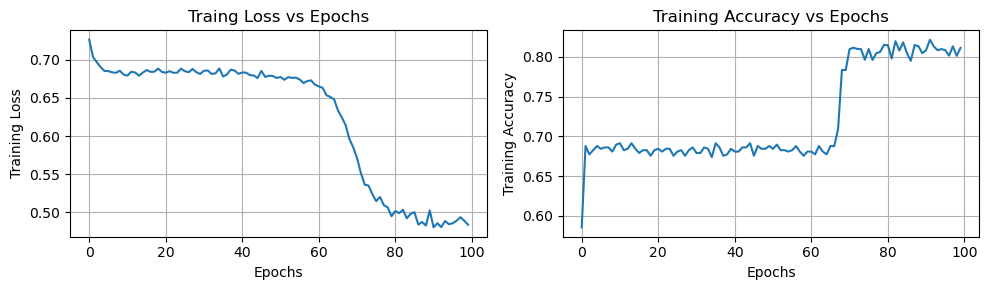

name='5_5-layer-wide-deep_Relu_adam_100_64' optimizer_name='adam', epochs=100, loss=0.48387108603262236
Epoch [20/100], Loss: 0.6841, Accuracy: 0.6843
Epoch [40/100], Loss: 0.6883, Accuracy: 0.6773
Epoch [60/100], Loss: 0.6840, Accuracy: 0.6843
Epoch [80/100], Loss: 0.6869, Accuracy: 0.6790
Epoch [100/100], Loss: 0.6840, Accuracy: 0.6843


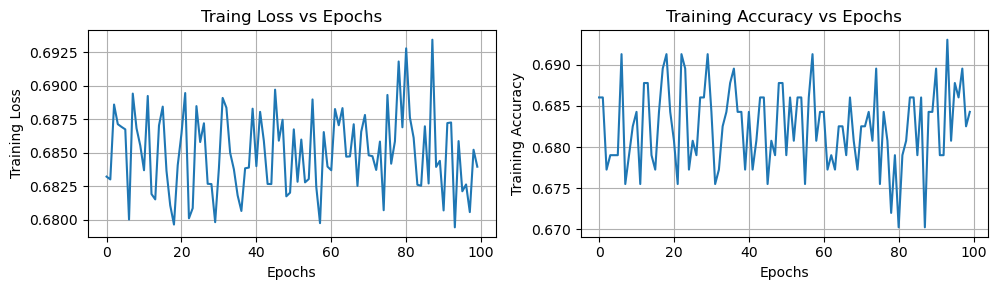

name='6_5-layer-wide-deep_Sigmoid_adam_100_64' optimizer_name='adam', epochs=100, loss=0.6839505216042332
Epoch [20/100], Loss: 0.6745, Accuracy: 0.6825
Epoch [40/100], Loss: 0.5380, Accuracy: 0.8099
Epoch [60/100], Loss: 0.4893, Accuracy: 0.8065
Epoch [80/100], Loss: 0.4895, Accuracy: 0.8028
Epoch [100/100], Loss: 0.4727, Accuracy: 0.8201


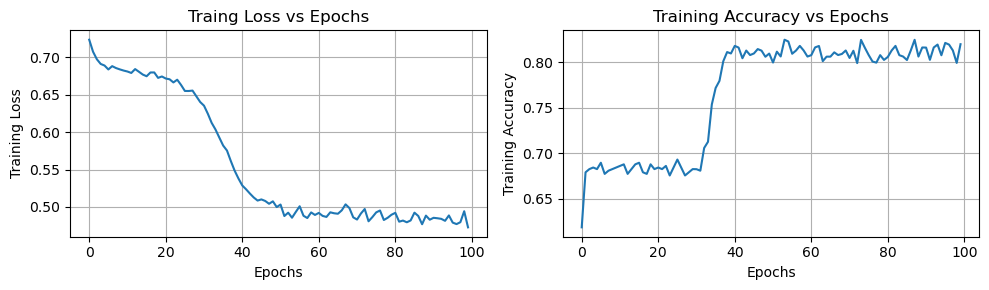

name='1_3-Layer-narrow_Relu_SGD_100_64' optimizer_name='SGD', epochs=100, loss=0.47268142574505123
Epoch [20/100], Loss: 0.6941, Accuracy: 0.6685
Epoch [40/100], Loss: 0.6827, Accuracy: 0.6860
Epoch [60/100], Loss: 0.6810, Accuracy: 0.6878
Epoch [80/100], Loss: 0.6868, Accuracy: 0.6773
Epoch [100/100], Loss: 0.6809, Accuracy: 0.6860


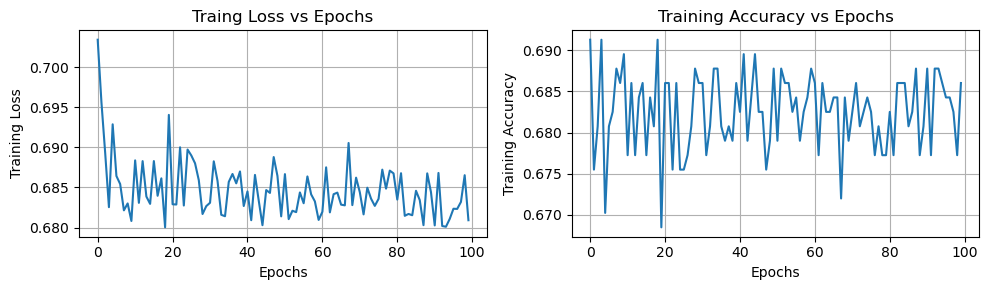

name='2_3-Layer-narrow_Sigmoid_SGD_100_64' optimizer_name='SGD', epochs=100, loss=0.680912526867535
Epoch [20/100], Loss: 0.5784, Accuracy: 0.7386
Epoch [40/100], Loss: 0.4988, Accuracy: 0.8131
Epoch [60/100], Loss: 0.4885, Accuracy: 0.8163
Epoch [80/100], Loss: 0.4802, Accuracy: 0.8199
Epoch [100/100], Loss: 0.4865, Accuracy: 0.8098


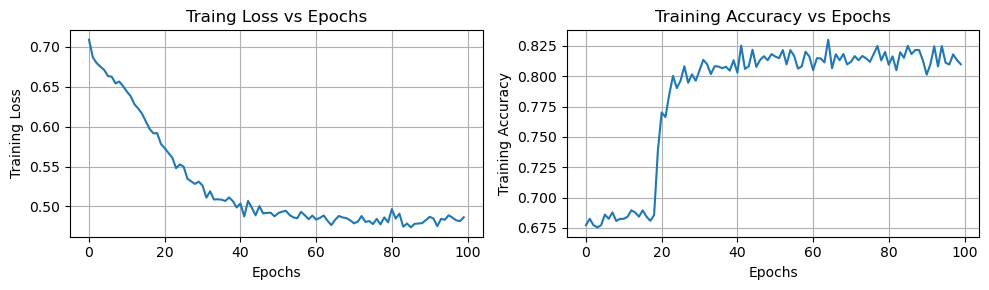

name='3_3-Layer-wide_Relu_SGD_100_64' optimizer_name='SGD', epochs=100, loss=0.4864704722823971
Epoch [20/100], Loss: 0.6860, Accuracy: 0.6808
Epoch [40/100], Loss: 0.6844, Accuracy: 0.6825
Epoch [60/100], Loss: 0.6853, Accuracy: 0.6808
Epoch [80/100], Loss: 0.6814, Accuracy: 0.6860
Epoch [100/100], Loss: 0.6835, Accuracy: 0.6808


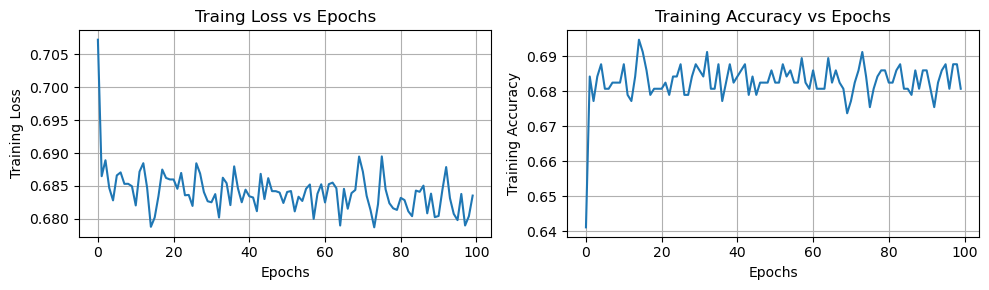

name='4_3-Layer-wide_Sigmoid_SGD_100_64' optimizer_name='SGD', epochs=100, loss=0.6835380378232953
Epoch [20/100], Loss: 0.6803, Accuracy: 0.6878
Epoch [40/100], Loss: 0.6790, Accuracy: 0.6860
Epoch [60/100], Loss: 0.6608, Accuracy: 0.6860
Epoch [80/100], Loss: 0.5154, Accuracy: 0.8150
Epoch [100/100], Loss: 0.4786, Accuracy: 0.8234


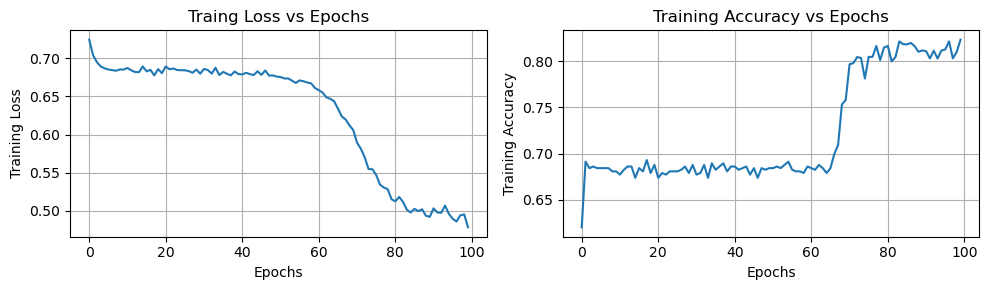

name='5_5-layer-wide-deep_Relu_SGD_100_64' optimizer_name='SGD', epochs=100, loss=0.4785847388932104
Epoch [20/100], Loss: 0.6828, Accuracy: 0.6860
Epoch [40/100], Loss: 0.6848, Accuracy: 0.6825
Epoch [60/100], Loss: 0.6832, Accuracy: 0.6860
Epoch [80/100], Loss: 0.6830, Accuracy: 0.6860
Epoch [100/100], Loss: 0.6839, Accuracy: 0.6843


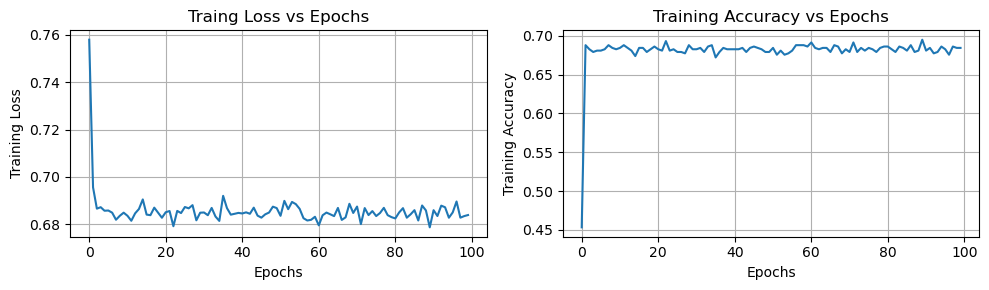

name='6_5-layer-wide-deep_Sigmoid_SGD_100_64' optimizer_name='SGD', epochs=100, loss=0.6838875068274911
Epoch [100/500], Loss: 0.4431, Accuracy: 0.7807
Epoch [200/500], Loss: 0.4166, Accuracy: 0.7905
Epoch [300/500], Loss: 0.4120, Accuracy: 0.7920
Epoch [400/500], Loss: 0.4123, Accuracy: 0.7839
Epoch [500/500], Loss: 0.4061, Accuracy: 0.7968


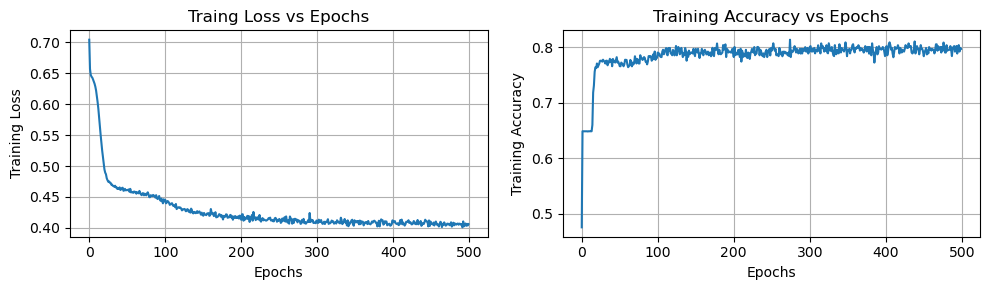

name='1_3-Layer-narrow_Relu_adam_500_32' optimizer_name='adam', epochs=500, loss=0.40610465814882685
Epoch [100/500], Loss: 0.6275, Accuracy: 0.6486
Epoch [200/500], Loss: 0.4706, Accuracy: 0.7673
Epoch [300/500], Loss: 0.4627, Accuracy: 0.7657
Epoch [400/500], Loss: 0.4597, Accuracy: 0.7641
Epoch [500/500], Loss: 0.4574, Accuracy: 0.7625


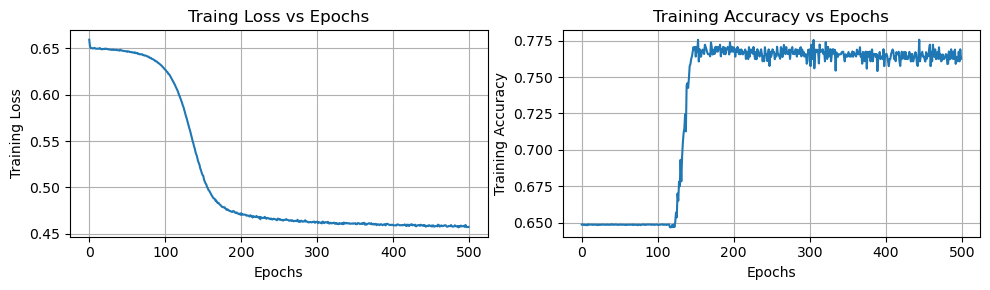

name='2_3-Layer-narrow_Sigmoid_adam_500_32' optimizer_name='adam', epochs=500, loss=0.4573878912006611
Epoch [100/500], Loss: 0.4389, Accuracy: 0.7868
Epoch [200/500], Loss: 0.4164, Accuracy: 0.8002
Epoch [300/500], Loss: 0.4069, Accuracy: 0.8167
Epoch [400/500], Loss: 0.3914, Accuracy: 0.8233
Epoch [500/500], Loss: 0.3770, Accuracy: 0.8285


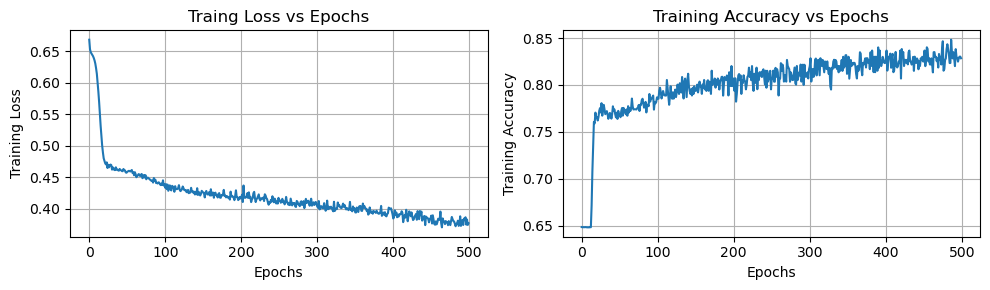

name='3_3-Layer-wide_Relu_adam_500_32' optimizer_name='adam', epochs=500, loss=0.3770241698087538
Epoch [100/500], Loss: 0.6385, Accuracy: 0.6486
Epoch [200/500], Loss: 0.4734, Accuracy: 0.7705
Epoch [300/500], Loss: 0.4659, Accuracy: 0.7739
Epoch [400/500], Loss: 0.4629, Accuracy: 0.7674
Epoch [500/500], Loss: 0.4598, Accuracy: 0.7639


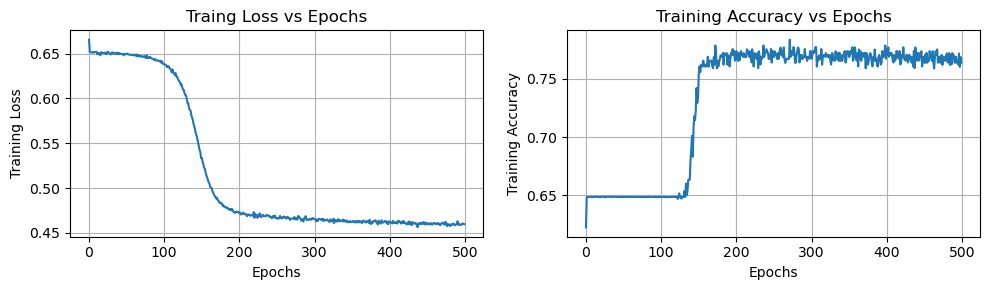

name='4_3-Layer-wide_Sigmoid_adam_500_32' optimizer_name='adam', epochs=500, loss=0.4597789553873229
Epoch [100/500], Loss: 0.6505, Accuracy: 0.6487
Epoch [200/500], Loss: 0.6503, Accuracy: 0.6486
Epoch [300/500], Loss: 0.6506, Accuracy: 0.6485
Epoch [400/500], Loss: 0.6508, Accuracy: 0.6482
Epoch [500/500], Loss: 0.6505, Accuracy: 0.6483


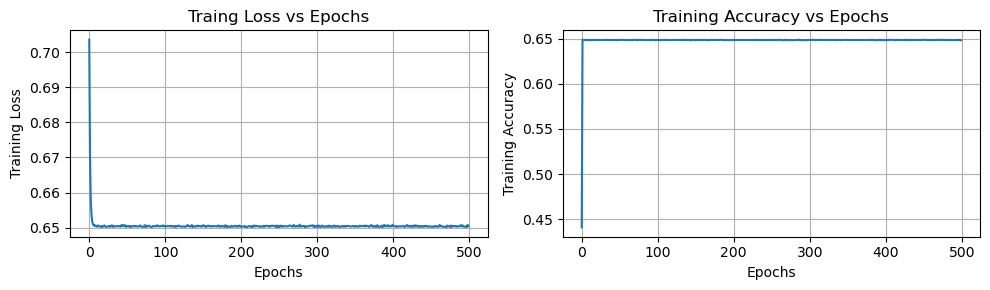

name='5_5-layer-wide-deep_Relu_adam_500_32' optimizer_name='adam', epochs=500, loss=0.6504798273278225
Epoch [100/500], Loss: 0.6508, Accuracy: 0.6483
Epoch [200/500], Loss: 0.6517, Accuracy: 0.6484
Epoch [300/500], Loss: 0.6507, Accuracy: 0.6488
Epoch [400/500], Loss: 0.6508, Accuracy: 0.6487
Epoch [500/500], Loss: 0.6510, Accuracy: 0.6482


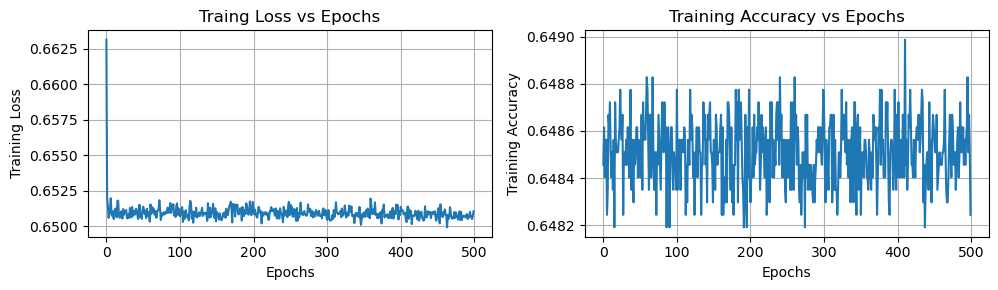

name='6_5-layer-wide-deep_Sigmoid_adam_500_32' optimizer_name='adam', epochs=500, loss=0.6510461244787377
Epoch [100/500], Loss: 0.6502, Accuracy: 0.6486
Epoch [200/500], Loss: 0.6505, Accuracy: 0.6485
Epoch [300/500], Loss: 0.6506, Accuracy: 0.6486
Epoch [400/500], Loss: 0.6505, Accuracy: 0.6482
Epoch [500/500], Loss: 0.6502, Accuracy: 0.6485


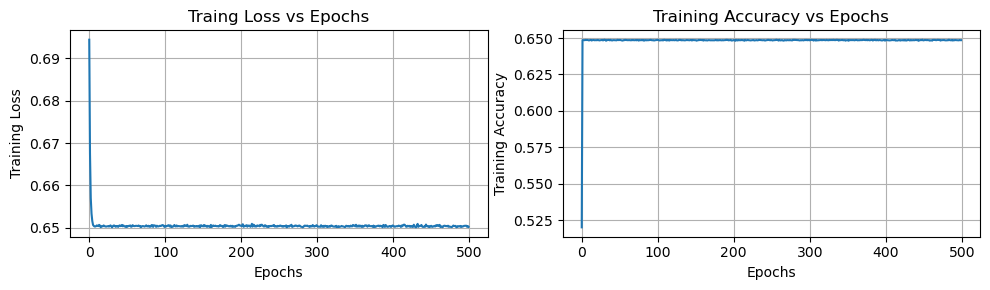

name='1_3-Layer-narrow_Relu_SGD_500_32' optimizer_name='SGD', epochs=500, loss=0.6501926346705027
Epoch [100/500], Loss: 0.6501, Accuracy: 0.6485
Epoch [200/500], Loss: 0.6477, Accuracy: 0.6483
Epoch [300/500], Loss: 0.5508, Accuracy: 0.7196
Epoch [400/500], Loss: 0.4653, Accuracy: 0.7656
Epoch [500/500], Loss: 0.4599, Accuracy: 0.7657


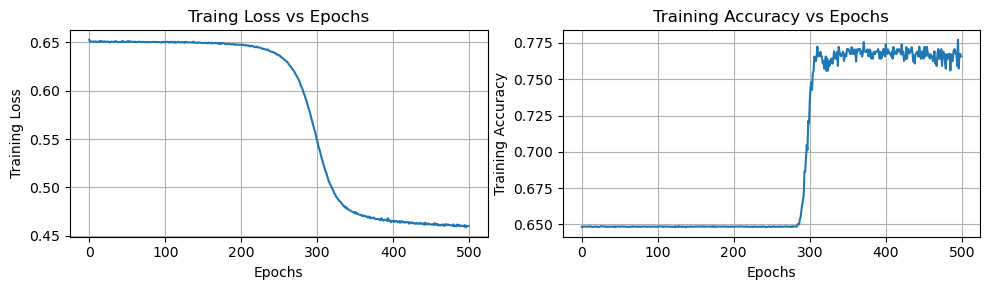

name='2_3-Layer-narrow_Sigmoid_SGD_500_32' optimizer_name='SGD', epochs=500, loss=0.4599058474897356
Epoch [100/500], Loss: 0.4449, Accuracy: 0.7771
Epoch [200/500], Loss: 0.4137, Accuracy: 0.8071
Epoch [300/500], Loss: 0.4032, Accuracy: 0.8085
Epoch [400/500], Loss: 0.3714, Accuracy: 0.8299
Epoch [500/500], Loss: 0.3574, Accuracy: 0.8348


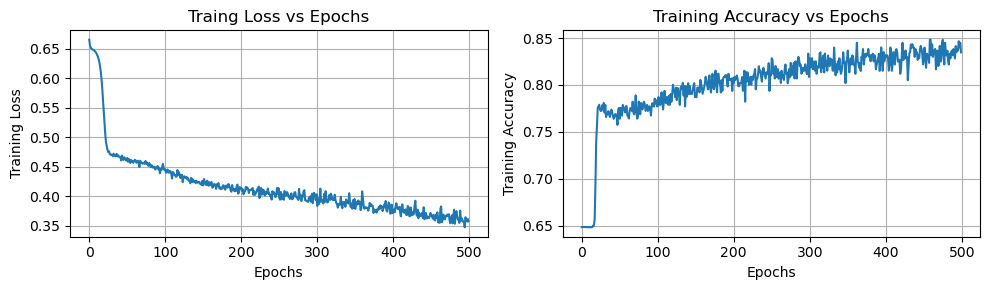

name='3_3-Layer-wide_Relu_SGD_500_32' optimizer_name='SGD', epochs=500, loss=0.3573807318874403
Epoch [100/500], Loss: 0.6014, Accuracy: 0.6485
Epoch [200/500], Loss: 0.4658, Accuracy: 0.7705
Epoch [300/500], Loss: 0.4629, Accuracy: 0.7707
Epoch [400/500], Loss: 0.4592, Accuracy: 0.7705
Epoch [500/500], Loss: 0.4594, Accuracy: 0.7641


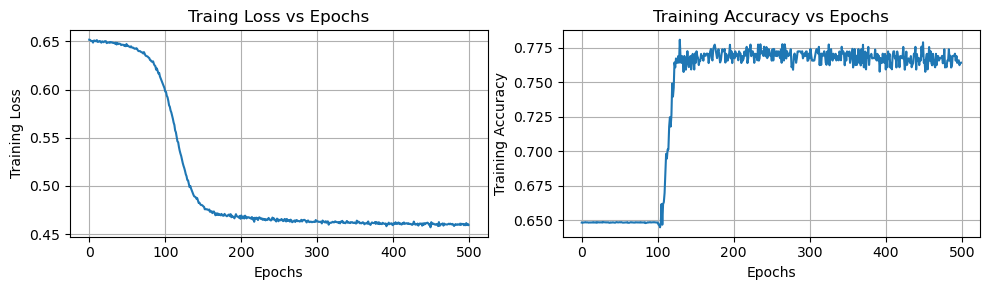

name='4_3-Layer-wide_Sigmoid_SGD_500_32' optimizer_name='SGD', epochs=500, loss=0.4594060090267678
Epoch [100/500], Loss: 0.4250, Accuracy: 0.8037
Epoch [200/500], Loss: 0.3936, Accuracy: 0.8235
Epoch [300/500], Loss: 0.3296, Accuracy: 0.8449
Epoch [400/500], Loss: 0.2542, Accuracy: 0.9010
Epoch [500/500], Loss: 0.1269, Accuracy: 0.9538


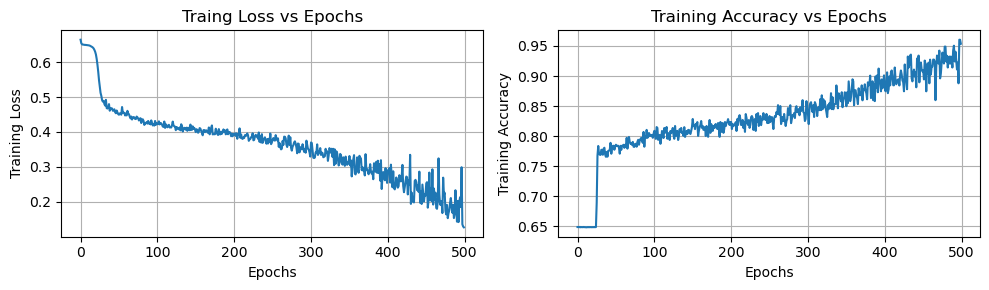

name='5_5-layer-wide-deep_Relu_SGD_500_32' optimizer_name='SGD', epochs=500, loss=0.12689996590527908
Epoch [100/500], Loss: 0.6507, Accuracy: 0.6486
Epoch [200/500], Loss: 0.6513, Accuracy: 0.6487
Epoch [300/500], Loss: 0.6507, Accuracy: 0.6486
Epoch [400/500], Loss: 0.6510, Accuracy: 0.6484
Epoch [500/500], Loss: 0.6509, Accuracy: 0.6486


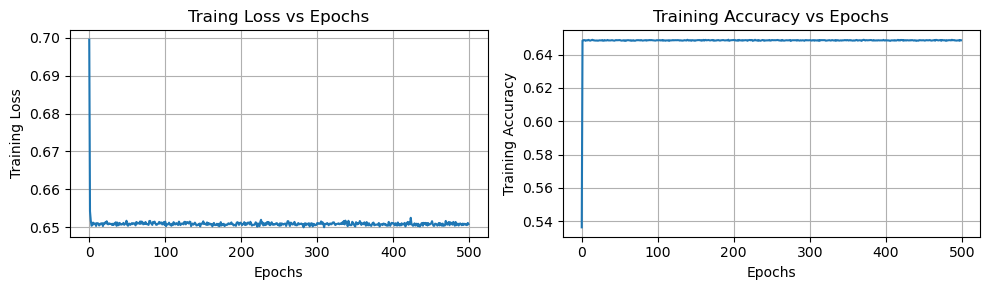

name='6_5-layer-wide-deep_Sigmoid_SGD_500_32' optimizer_name='SGD', epochs=500, loss=0.6508725966024634
Epoch [100/500], Loss: 0.6875, Accuracy: 0.6773
Epoch [200/500], Loss: 0.5029, Accuracy: 0.8163
Epoch [300/500], Loss: 0.4934, Accuracy: 0.8064
Epoch [400/500], Loss: 0.4848, Accuracy: 0.8029
Epoch [500/500], Loss: 0.4649, Accuracy: 0.8277


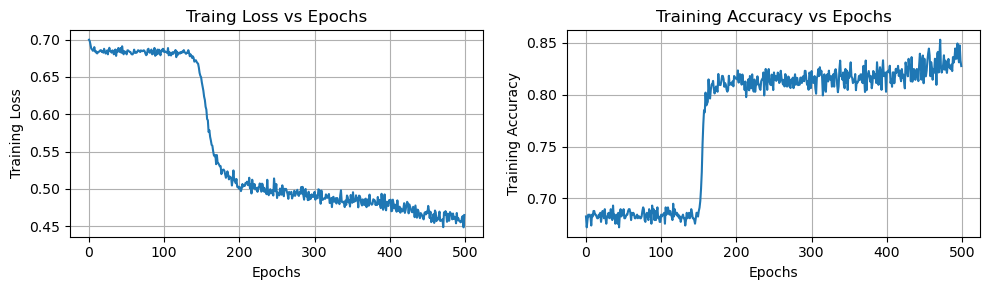

name='1_3-Layer-narrow_Relu_adam_500_64' optimizer_name='adam', epochs=500, loss=0.4648796031266893
Epoch [100/500], Loss: 0.6809, Accuracy: 0.6825
Epoch [200/500], Loss: 0.6506, Accuracy: 0.6878
Epoch [300/500], Loss: 0.5201, Accuracy: 0.8114
Epoch [400/500], Loss: 0.4951, Accuracy: 0.8045
Epoch [500/500], Loss: 0.4800, Accuracy: 0.8101


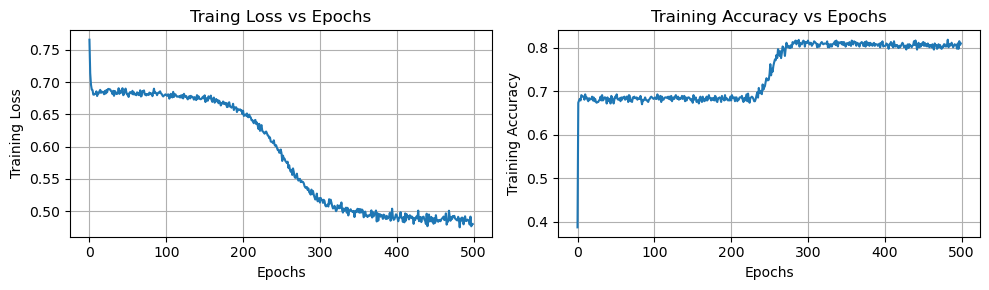

name='2_3-Layer-narrow_Sigmoid_adam_500_64' optimizer_name='adam', epochs=500, loss=0.4800246897010866
Epoch [100/500], Loss: 0.4771, Accuracy: 0.8215
Epoch [200/500], Loss: 0.4643, Accuracy: 0.8147
Epoch [300/500], Loss: 0.4456, Accuracy: 0.8410
Epoch [400/500], Loss: 0.4441, Accuracy: 0.8425
Epoch [500/500], Loss: 0.4241, Accuracy: 0.8464


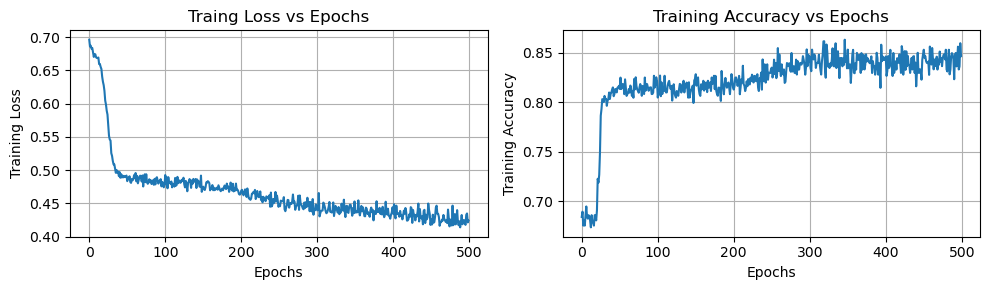

name='3_3-Layer-wide_Relu_adam_500_64' optimizer_name='adam', epochs=500, loss=0.42414569383398115
Epoch [100/500], Loss: 0.6781, Accuracy: 0.6895
Epoch [200/500], Loss: 0.6625, Accuracy: 0.6808
Epoch [300/500], Loss: 0.5173, Accuracy: 0.8181
Epoch [400/500], Loss: 0.4860, Accuracy: 0.8150
Epoch [500/500], Loss: 0.4810, Accuracy: 0.8051


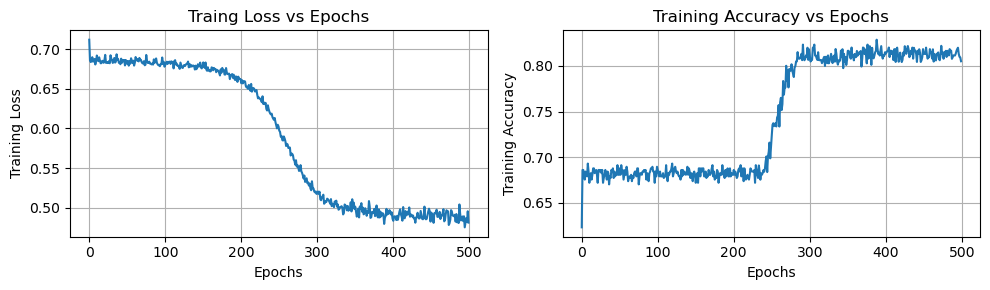

name='4_3-Layer-wide_Sigmoid_adam_500_64' optimizer_name='adam', epochs=500, loss=0.48096412017671436
Epoch [100/500], Loss: 0.4580, Accuracy: 0.8281
Epoch [200/500], Loss: 0.4115, Accuracy: 0.8678
Epoch [300/500], Loss: 0.3735, Accuracy: 0.8927
Epoch [400/500], Loss: 0.3444, Accuracy: 0.9156
Epoch [500/500], Loss: 0.2775, Accuracy: 0.9420


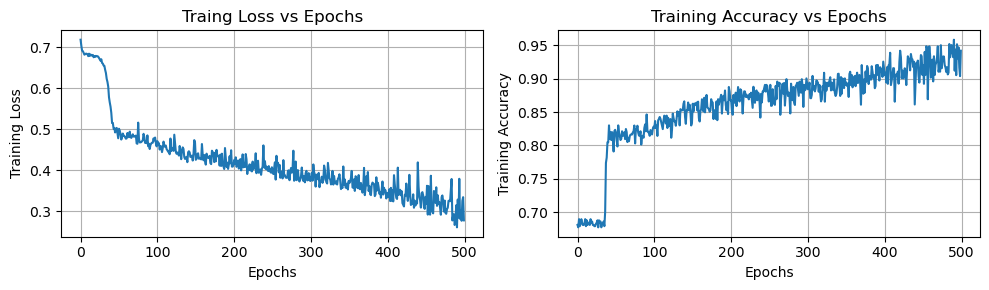

name='5_5-layer-wide-deep_Relu_adam_500_64' optimizer_name='adam', epochs=500, loss=0.2775004762401298
Epoch [100/500], Loss: 0.6816, Accuracy: 0.6878
Epoch [200/500], Loss: 0.6821, Accuracy: 0.6878
Epoch [300/500], Loss: 0.6860, Accuracy: 0.6808
Epoch [400/500], Loss: 0.6849, Accuracy: 0.6825
Epoch [500/500], Loss: 0.6909, Accuracy: 0.6738


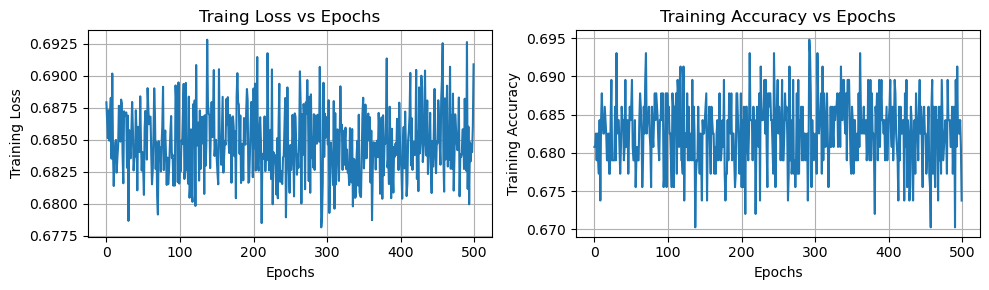

name='6_5-layer-wide-deep_Sigmoid_adam_500_64' optimizer_name='adam', epochs=500, loss=0.6909057516635349
Epoch [100/500], Loss: 0.4859, Accuracy: 0.8181
Epoch [200/500], Loss: 0.4758, Accuracy: 0.8201
Epoch [300/500], Loss: 0.4765, Accuracy: 0.8032
Epoch [400/500], Loss: 0.4844, Accuracy: 0.8016
Epoch [500/500], Loss: 0.4780, Accuracy: 0.8196


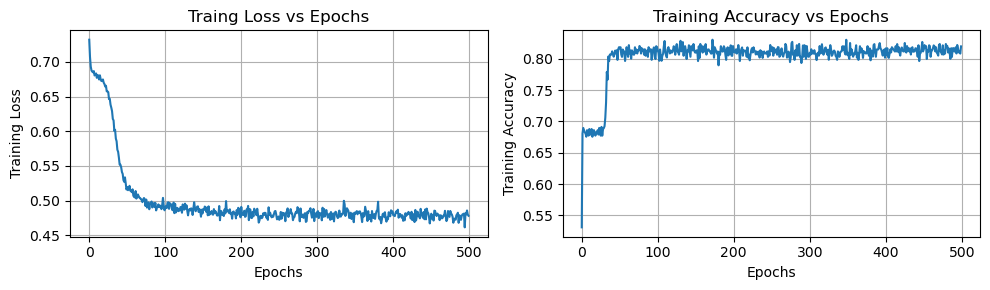

name='1_3-Layer-narrow_Relu_SGD_500_64' optimizer_name='SGD', epochs=500, loss=0.4780352213826564
Epoch [100/500], Loss: 0.6846, Accuracy: 0.6825
Epoch [200/500], Loss: 0.6834, Accuracy: 0.6843
Epoch [300/500], Loss: 0.6816, Accuracy: 0.6860
Epoch [400/500], Loss: 0.6867, Accuracy: 0.6738
Epoch [500/500], Loss: 0.6577, Accuracy: 0.6913


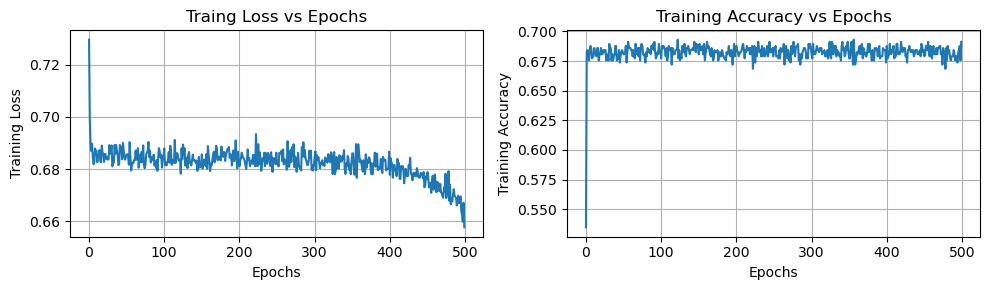

name='2_3-Layer-narrow_Sigmoid_SGD_500_64' optimizer_name='SGD', epochs=500, loss=0.6576681372754067
Epoch [100/500], Loss: 0.4798, Accuracy: 0.8113
Epoch [200/500], Loss: 0.4724, Accuracy: 0.8178
Epoch [300/500], Loss: 0.4390, Accuracy: 0.8530
Epoch [400/500], Loss: 0.4392, Accuracy: 0.8429
Epoch [500/500], Loss: 0.4297, Accuracy: 0.8459


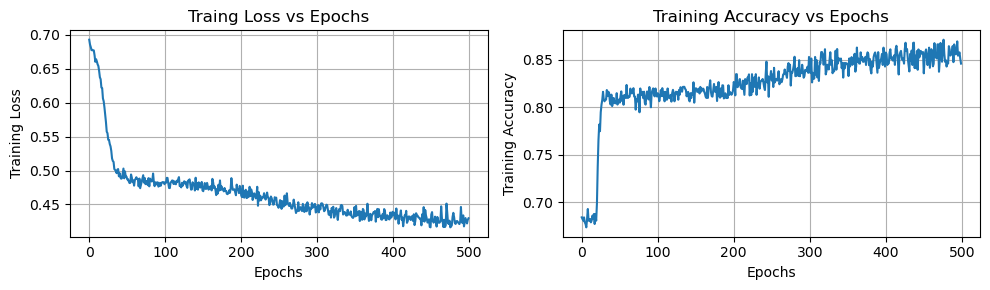

name='3_3-Layer-wide_Relu_SGD_500_64' optimizer_name='SGD', epochs=500, loss=0.42965383388261624
Epoch [100/500], Loss: 0.6844, Accuracy: 0.6773
Epoch [200/500], Loss: 0.6562, Accuracy: 0.6790
Epoch [300/500], Loss: 0.5186, Accuracy: 0.8015
Epoch [400/500], Loss: 0.4878, Accuracy: 0.8184
Epoch [500/500], Loss: 0.4841, Accuracy: 0.8167


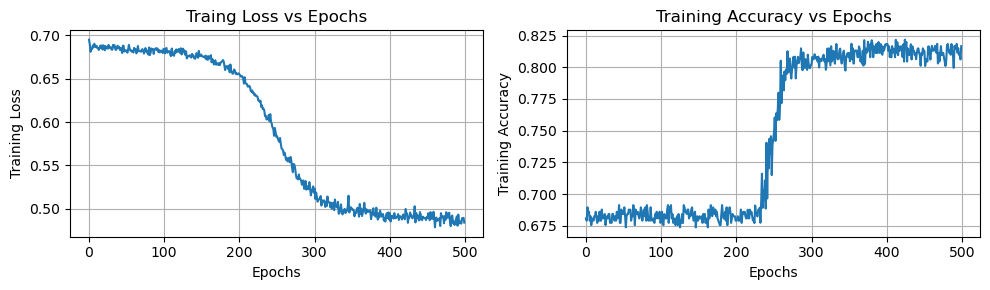

name='4_3-Layer-wide_Sigmoid_SGD_500_64' optimizer_name='SGD', epochs=500, loss=0.4841091181143897
Epoch [100/500], Loss: 0.4596, Accuracy: 0.8429
Epoch [200/500], Loss: 0.4129, Accuracy: 0.8644
Epoch [300/500], Loss: 0.3960, Accuracy: 0.8691
Epoch [400/500], Loss: 0.3379, Accuracy: 0.9055
Epoch [500/500], Loss: 0.2879, Accuracy: 0.9287


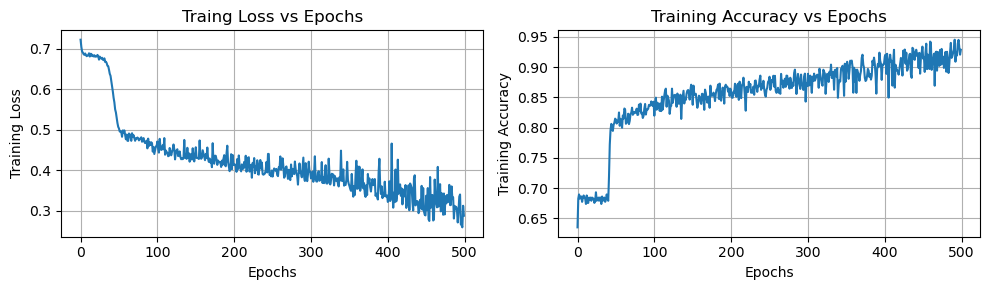

name='5_5-layer-wide-deep_Relu_SGD_500_64' optimizer_name='SGD', epochs=500, loss=0.2879130003676187
Epoch [100/500], Loss: 0.6830, Accuracy: 0.6860
Epoch [200/500], Loss: 0.6865, Accuracy: 0.6808
Epoch [300/500], Loss: 0.6856, Accuracy: 0.6808
Epoch [400/500], Loss: 0.6836, Accuracy: 0.6843
Epoch [500/500], Loss: 0.6873, Accuracy: 0.6790


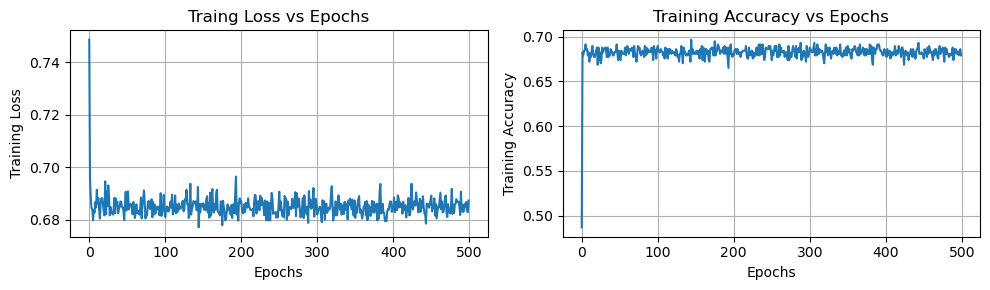

name='6_5-layer-wide-deep_Sigmoid_SGD_500_64' optimizer_name='SGD', epochs=500, loss=0.6872994047413156


In [20]:
"""
    Training many neural netowrk created and then changing the hyper-parameters to see how model is performing
"""
pytorch_models, model_names = load_different_pytorch_model(X_train_tensor.shape[1])

epochs_list = [100, 500]

batch_sizes = [32, 64]

optimizers = ['adam', 'SGD']

models_with_param = {}

        
for epochs in epochs_list:

    for batch_size in batch_sizes:

        for optimizer_name in optimizers:

            pytorch_models, model_names = load_different_pytorch_model(X_train_tensor.shape[1])

            for i, pytorch_model in enumerate(pytorch_models):

                if optimizer_name == 'optimizer':
                    optimizer = optim.Adam(pytorch_model.parameters(), lr=0.1)
                else: 
                    optimizer = optim.SGD(pytorch_model.parameters(), lr=0.1)
              

                name = f"{i+1}_{model_names[i]}_{optimizer_name}_{epochs}_{batch_size}"
                
                trained_model, losses, accuracies  = train(X_train_tensor, 
                                                          y_train_tensor, 
                                                          pytorch_model, 
                                                          criterion = nn.BCELoss(),
                                                          optimizer = optimizer,
                                                          epochs = epochs, 
                                                          batch_size=batch_size,
                                                           verbose=1
                                                         )
                name = f"{i+1}_{model_names[i]}_{optimizer_name}_{epochs}_{batch_size}"
                print(f"{name=} {optimizer_name=}, {epochs=}, loss={losses[-1]}")

                models_with_param[name] = trained_model


## Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why

In [21]:
result = {"name": [], "model": [], "activation_fun": [], "optimizer" : [], "epochs": [], 
          "batch_size": [], "train_accuracy": [], "test_accuracy": []}

best_accuracy, best_model = 0.0, ""

for model_name in sorted(models_with_param.keys()):
    pytorch_model = models_with_param[model_name]

    model_params = model_name.split("_")
    result["name"].append(model_params[1])
    result["activation_fun"].append(model_params[2])
    result["optimizer"].append(model_params[3])
    result["epochs"].append(model_params[4])
    result["batch_size"].append(model_params[5])
    
    summary_str = ""
    for i, (name, param) in enumerate(pytorch_model.named_parameters()):
        layer_summary = f"Layer {i} Size = {param.shape}, "
        summary_str += layer_summary
    result["model"].append(summary_str)
    
    print(f"\n\tEavluating Model = {model_name}")

    y_train_pred = predict_pytorch(pytorch_model, X_train_tensor, 0)
    train_accuracy = calculate_accuracy_pytorch(y_train_tensor, y_train_pred)
    
    y_test_pred = predict_pytorch(pytorch_model, X_test_tensor)
    test_accuracy = calculate_accuracy_pytorch(y_test_tensor, y_test_pred)
    
    result["train_accuracy"].append(train_accuracy)
    result["test_accuracy"].append(test_accuracy)
    print(f"{test_accuracy=}")
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model_name



	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_100_32
raw scores =  tensor([0.8863, 0.4785, 0.4637, 0.7067, 0.9512], grad_fn=<SliceBackward0>)
predictions =  tensor([1., 0., 0., 1., 1.])
test_accuracy=72.36842105263158

	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_100_64
raw scores =  tensor([0.8246, 0.5912, 0.3960, 0.8039, 0.9800], grad_fn=<SliceBackward0>)
predictions =  tensor([1., 1., 0., 1., 1.])
test_accuracy=76.31578947368422

	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_500_32
raw scores =  tensor([0.6471, 0.6474, 0.6474, 0.6474, 0.6474], grad_fn=<SliceBackward0>)
predictions =  tensor([1., 1., 1., 1., 1.])
test_accuracy=67.76315789473685

	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_500_64
raw scores =  tensor([0.8230, 0.5413, 0.2843, 0.7506, 0.9724], grad_fn=<SliceBackward0>)
predictions =  tensor([1., 1., 0., 1., 1.])
test_accuracy=73.02631578947368

	Eavluating Model = 1_3-Layer-narrow_Relu_adam_100_32
raw scores =  tensor([0.7798, 0.4775, 0.2417, 0.7236, 0.9681], grad_f

In [22]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.expand_frame_repr', False)
result_df = pd.DataFrame(result)
result_df.head(100)

name                                                                                                                                                                                                                                                                                                                                                     model activation_fun optimizer epochs batch_size  train_accuracy  test_accuracy
0      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu       SGD    100         32       78.747941      72.368421
1      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu       SGD    100         64       77.924217      76.315789
2      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu       SGD    500         32       64.744646      67.763158
3      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu       SGD    500         64       76.935750      73.026316
4      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu      adam    100         32       74.794069      74.342105
5      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu      adam    100         64       78.088962      74.342105
6      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu      adam    500         32       80.065898      69.736842
7      3-Layer-narrow                                                                                                                                                 Layer 0 Size = torch.Size([4, 8]), Layer 1 Size = torch.Size([4]), Layer 2 Size = torch.Size([4, 4]), Layer 3 Size = torch.Size([4]), Layer 4 Size = torch.Size([1, 4]), Layer 5 Size = torch.Size([1]),            Relu      adam    500         64       78.583196      73.684211
8      3-Layer-narrow                  

In [23]:
print(f"{best_accuracy=}")
print("\n\nbest model is =")
print(models_with_param[best_model])

best_accuracy=77.63157894736842


best model is =
Sequential(
  (0): Linear(in_features=8, out_features=4, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)


### Explaination

    - Its clear that as the Model is getting complex the training accuracy is getting higher.
    
    - As the model getting mode complex test accuracy is getting lower.
    
    - Higher train accuracy and lower test accuracy point to overfitting of the model becuase.
    
    - From the above Result Data Frame its clear that network was getting Complex the training accuracy also degraded and the test accuracy.
    
    - The data size was also small, as the neural networks perform better with large data.
    
